# 📘 데이터분석
---

# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 K 보험사의 직원입니다. K 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
*  [필요시] 구글 colab 설정 방법
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Path
# path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. 데이터 불러오기
2. 데이터 기초 정보 확인
3. 주요 변수 선정 및 탐색
    * 분석가 선정 칼럼 탐색
    * 도메인 주요 항목 칼럼 탐색

---------------------------------------------------------------------------------------------
# **1. 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.

In [1]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 등 임포트 하기

import numpy as np
import pandas as pd
import seaborn as sns
import os

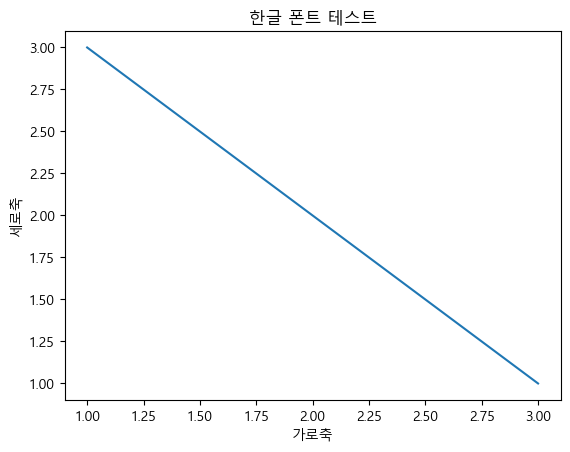

In [2]:
# 한글 세팅

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Windows용 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 확인용 그래프ㅐ ㅑ  ㅑㅑㅑㅑㅑㅑㅑㅑㅑ ㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑㅑ                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [,    
plt.plot([1, 2, 3], [3, 2, 1])
plt.title("한글 폰트 테스트")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.show()


In [3]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러오기
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('customers_seg.csv')

# [참고] colab으로 진행할 때 
# data = pd.read_csv(path+'customers_seg.csv')
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


---------------------------------------------------------------------------------------------
# **2. 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [4]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.

data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [5]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.
data.tail()


,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
11995,11996,1,계약자,고용,1,25.9851,0,기본,대학졸업,86451000,...,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11996,11997,3,피보험자,고용,0,3.4410,1,중급,대학졸업,25962000,...,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11997,11998,3,피보험자,무직,1,9.0576,0,중급,대학졸업,0,...,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중
11998,11999,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,...,기혼,100,0,3,비방문,포인트,자사영업,854000,일반세단,대
11999,12000,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,...,미혼,80,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


In [7]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)
data.shape


(12000, 21)

In [8]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [12]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자
data.describe(include = 'all')


,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
count,12000.00000,12000.000000,12000,12000,12000.000000,12000.000000,12000.000000,12000,12000,1.200000e+04,...,12000,12000.000000,12000.000000,12000,12000,12000,12000,1.200000e+04,12000,12000
unique,NaN,NaN,2,4,NaN,NaN,NaN,3,4,NaN,...,2,NaN,NaN,4,3,4,4,NaN,5,3
top,NaN,NaN,계약자,고용,NaN,NaN,NaN,기본,대학졸업,NaN,...,기혼,NaN,NaN,1,비방문,할인,대리점,NaN,일반세단,중
freq,NaN,NaN,9425,7518,NaN,NaN,NaN,7278,7105,NaN,...,6957,NaN,NaN,4283,8928,4906,4592,NaN,6074,8423
mean,6000.50000,3.079000,NaN,NaN,0.487583,8.859478,0.143000,NaN,NaN,4.641737e+07,...,NaN,100.065833,0.390167,NaN,NaN,NaN,NaN,5.355854e+05,NaN,NaN
std,3464.24595,1.121768,NaN,NaN,0.499867,7.698885,0.350087,NaN,NaN,3.736221e+07,...,NaN,42.453750,0.919605,NaN,NaN,NaN,NaN,3.587993e+05,NaN,NaN
min,1.00000,1.000000,NaN,NaN,0.000000,2.045730,0.000000,NaN,NaN,0.000000e+00,...,NaN,60.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,3000.75000,3.000000,NaN,NaN,0.000000,4.373400,0.000000,NaN,NaN,0.000000e+00,...,NaN,70.000000,0.000000,NaN,NaN,NaN,NaN,3.360000e+05,NaN,NaN
50%,6000.50000,3.000000,NaN,NaN,0.000000,6.384831,0.000000,NaN,NaN,4.186240e+07,...,NaN,90.000000,0.000000,NaN,NaN,NaN,NaN,4.740000e+05,NaN,NaN
75%,9000.25000,4.000000,NaN,NaN,1.000000,9.867900,0.000000,NaN,NaN,7.664150e+07,...,NaN,120.000000,0.000000,NaN,NaN,NaN,NaN,6.790000e+05,NaN,NaN


In [10]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.
col_list = [data.columns]
col_list


[Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
        '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
        '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
       dtype='object')]

---------------------------------------------------------------------------------------------
# **3. 주요 변수 선정 및 탐색**

<b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!

---------------------------------------------------------------------------------------------
<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
<font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 K보험사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

## <b> (1) 분석가 선정 컬럼 탐색하기
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 탐색해 보자!

In [14]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)

data['AGE'].value_counts()

AGE
3    4775
4    3124
2    1538
1    1454
5    1057
6      52
Name: count, dtype: int64

**【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**

### 1) AGE

In [ ]:
#[같이 하기] AGE 변수는 범주형이다. 이에 대해 범주별 비율을 탐색해보자.(.value_counts())
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)
# 결과를 인덱스 기준으로 정렬해서 조회 (.sort_index())

data['AGE'].value_counts(normalize = True).sort_index()

<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 연령대를 보았을 때 약 40% 정도가 40대 임을 알 수 있다. 약 4~50대가 65% 정도이다.

In [ ]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

sns.countplot(x='AGE',data=data)
plt.title('age')
plt.grid()
plt.show()

### 2) 고용상태

In [15]:
#[문제 8] '고용상태' 변수에 대해 범주별 빈도수를 탐색해보자.

data['고용상태'].value_counts()

고용상태
고용       7518
무직       3028
휴직       1094
FALSE     360
Name: count, dtype: int64

In [16]:
#[문제 9] 위 결과에 대해 비율로 계산해보자.
data['고용상태'].value_counts(normalize= True)

고용상태
고용       0.626500
무직       0.252333
휴직       0.091167
FALSE    0.030000
Name: proportion, dtype: float64

In [21]:
#[문제 10] FALSE 값이 있잖어? 이게 뭐지?
# False를 무엇으로 해석해야 할까?

data = data[data['고용상태'] != 'FALSE']
data['고용상태'].value_counts()

고용상태
고용    7518
무직    3028
휴직    1094
Name: count, dtype: int64

<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**


In [22]:
# 고용상태에는 무직, 휴직, 고용이라는 3개의 값으로 구성되어야하는데, FALSE라는 값이 존재함 -> 이를 삭제함

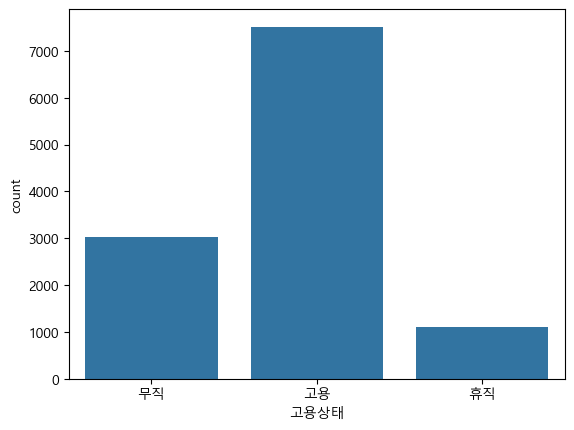

In [36]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(data, x = '고용상태')
plt.show()


### 3) 교육수준

In [37]:
#[문제 12] '교육수준' 변수에 대해 범주별 빈도수를 탐색해보자.
data['교육수준'].value_counts()

교육수준
대학졸업    6864
고졸이하    3387
석사       952
박사       437
Name: count, dtype: int64

In [38]:
#[문제 13] 위 결과에 대해 비율로 계산해보자.

data['교육수준'].value_counts(normalize = True)

교육수준
대학졸업    0.589691
고졸이하    0.290979
석사      0.081787
박사      0.037543
Name: proportion, dtype: float64

<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [40]:
# 학사 졸업이 약 60프로로 제일 많고, 그 다음은 고졸이하, 석사, 박사 순이다

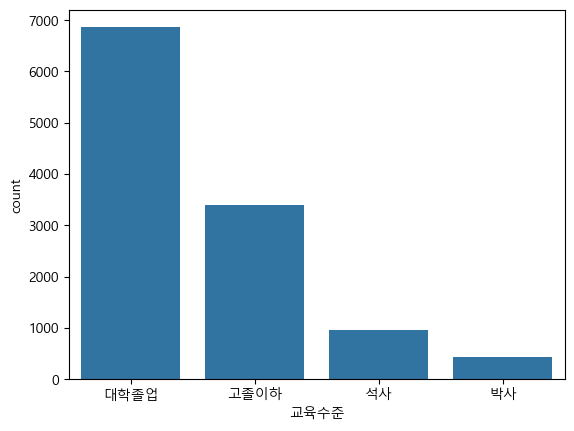

In [39]:
#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(data, x = '교육수준')
plt.show()


### 4) 상품타입

In [43]:
#[문제 15] '상품타입'변수에 대해 범주별 비율을 탐색해보자.

print(data['상품타입'].value_counts())

print(data['상품타입'].value_counts(normalize= True))

상품타입
기본    7065
중급    3515
고급    1060
Name: count, dtype: int64
상품타입
기본    0.606959
중급    0.301976
고급    0.091065
Name: proportion, dtype: float64


<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [44]:
# 기본타입이 60%로 제일 많고, 중급은 30%되고, 고급은 10%프로 미만이다

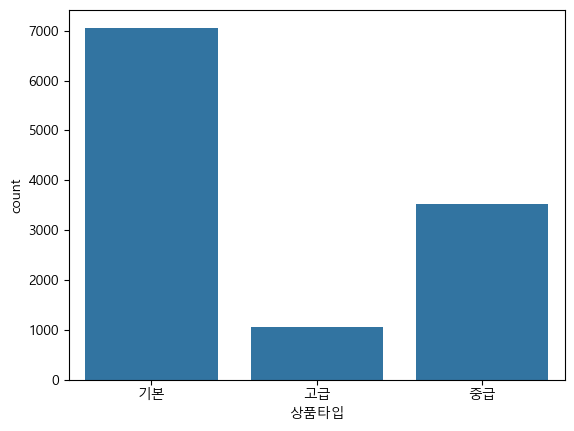

In [42]:
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(data, x = '상품타입')
plt.show()


### 5) 거주지사이즈

In [45]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자.

print(data['거주지사이즈'].value_counts())

print(data['거주지사이즈'].value_counts(normalize= True))

거주지사이즈
중    8150
소    2286
대    1204
Name: count, dtype: int64
거주지사이즈
중    0.700172
소    0.196392
대    0.103436
Name: proportion, dtype: float64


<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [47]:
# 중간 사이즈의 거주지가 제일 많음 약 70%, 그 다음으로는 소, 대 사이즈다

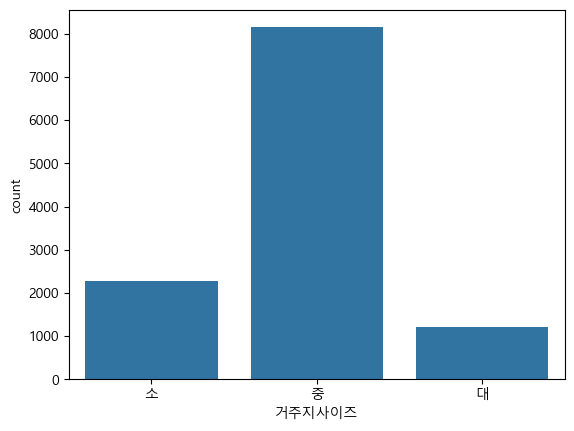

In [46]:
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(data, x = '거주지사이즈')
plt.show()

### 6) 자동차

In [49]:
#[문제 19]'자동차'변수에 대해 범주별 비율을 탐색해보자.

print(data['자동차'].value_counts(), '\n')

print(data['자동차'].value_counts(normalize= True))

자동차
일반세단    5895
컴팩트카    2408
SUV     2265
스포츠카     627
고급차      445
Name: count, dtype: int64 

자동차
일반세단    0.506443
컴팩트카    0.206873
SUV     0.194588
스포츠카    0.053866
고급차     0.038230
Name: proportion, dtype: float64


<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [51]:
# 절반이상이 일반 세단이며, 컴팩트카와 suv가 그 다음을 이루고, 스포츠카와 고급차는 10%미만이다

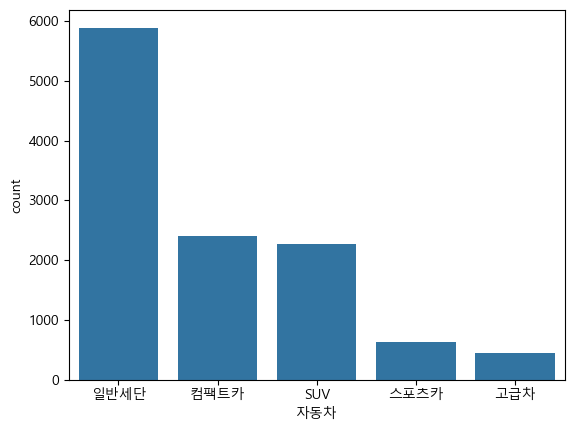

In [50]:
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(data, x = '자동차')
plt.show()


## **(2) 도메인 주요 항목 컬럼 탐색하기**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 histplot 을 통해서 탐색해 보자

In [56]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)

data[ ['Willingness to pay/Stay', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액'] ].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11640 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Willingness to pay/Stay  11640 non-null  float64
 1   소득                       11640 non-null  int64  
 2   월 납입액                    11640 non-null  int64  
 3   타 상품 보유 현황               11640 non-null  object 
 4   총지불금액                    11640 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 545.6+ KB


### 1) WTP(Willingness to pay/Stay)
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


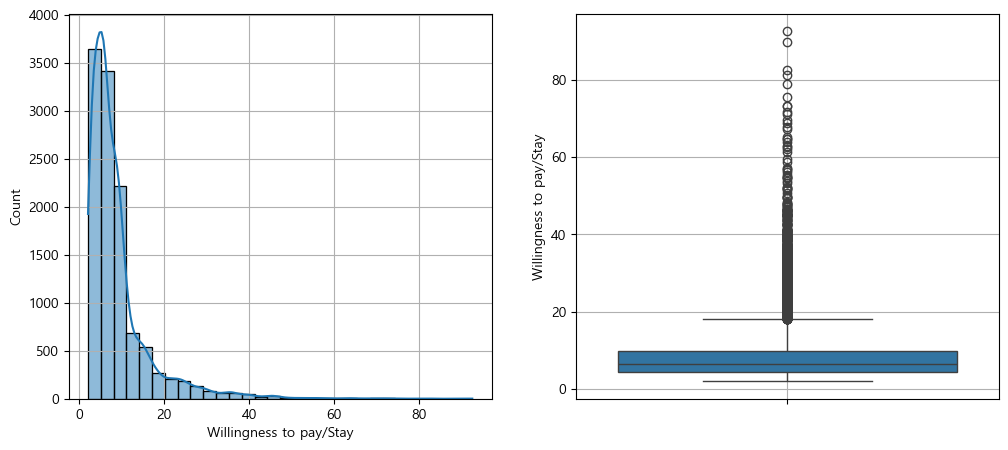

In [81]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.
sns.histplot(data['Willingness to pay/Stay'], bins=30, kde=True, ax=axes[0])
axes[0].grid(True)

sns.boxplot(data=data, y='Willingness to pay/Stay', ax=axes[1])
axes[1].grid(True)

plt.show()


In [76]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)
q1 = data['Willingness to pay/Stay'].quantile(0.25)
q3 = data['Willingness to pay/Stay'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

upper_count = len(data[data['Willingness to pay/Stay'] > upper])
print('upper', upper_count , upper_count / len(data))

print(data['Willingness to pay/Stay'].describe())

upper 1052 0.09037800687285223
count    11640.000000
mean         8.873374
std          7.731851
min          2.045730
25%          4.384500
50%          6.389216
75%          9.856800
max         92.496300
Name: Willingness to pay/Stay, dtype: float64


<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [68]:
# 평균값은 8.87이지만, IQR을 이용한 값을 봤을 떄 Q3가 9.85로 이상치 이상의 데이터가 1052개(약 9%)가 있음을 볼 수 있다.

### 2) 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

In [88]:
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


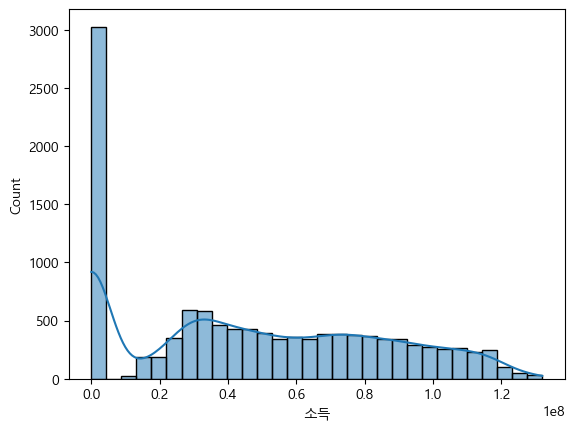

In [102]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

sns.histplot(data['소득'], bins=30, kde=True)
plt.show()

<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [100]:
print(len(data[data['소득'] == 0]) / len(data))
print(data['소득'].describe())

0.26013745704467356
count    1.164000e+04
mean     4.706727e+07
std      3.773039e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.375855e+07
75%      7.754318e+07
max      1.320209e+08
Name: 소득, dtype: float64


In [101]:
# 10^8 -> 1억  : 평균 4300만원정도 벌고, 0원 소득이 약 26%로 많음

### 3) 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

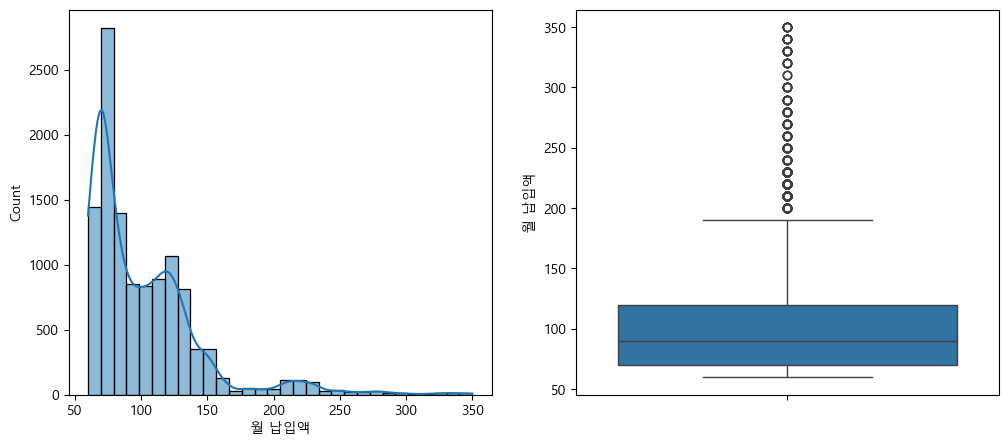

In [110]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

fig, axes = plt.subplots(1,2, figsize = (12, 5))

sns.histplot(data['월 납입액'], bins = 30, kde = True, ax=axes[0])
sns.boxplot(data=data, y='월 납입액', ax=axes[1])
plt.show()

In [113]:
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
q1 = data['월 납입액'].quantile(0.25)
q3 = data['월 납입액'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5 * iqr

upper_count = len(data[data['월 납입액'] > upper])
print('upper', upper_count , upper_count / len(data))

print(data['월 납입액'].describe())

upper 554 0.047594501718213056
count    11640.000000
mean       100.150344
std         42.409430
min         60.000000
25%         70.000000
50%         90.000000
75%        120.000000
max        350.000000
Name: 월 납입액, dtype: float64


<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [114]:
# 평균은 10만원정도 납입을 하지만, 중위값은 7만원이다. 약 4%의 비율로 이상치 이상의 납입액을 납부하는 사람들도 있음

### 4) 타상품 보유
* 문자형/범주형 컬럼이기 때문에 범주 비율로 확인해보기

In [118]:
#[문제 25] '타상품 보유' 변수에 대해 범주별 비율을 확인하자.

print(data['타 상품 보유 현황'].value_counts())

print('\n', data['타 상품 보유 현황'].value_counts(normalize=True))

타 상품 보유 현황
1      4142
4이상    3085
2      2910
3      1503
Name: count, dtype: int64

 타 상품 보유 현황
1      0.355842
4이상    0.265034
2      0.250000
3      0.129124
Name: proportion, dtype: float64


<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [119]:
# 1개는 35%정도로 보이고 2개는 25%, 3개는 12%, 4개 이상은 26% 된다

### 5) 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

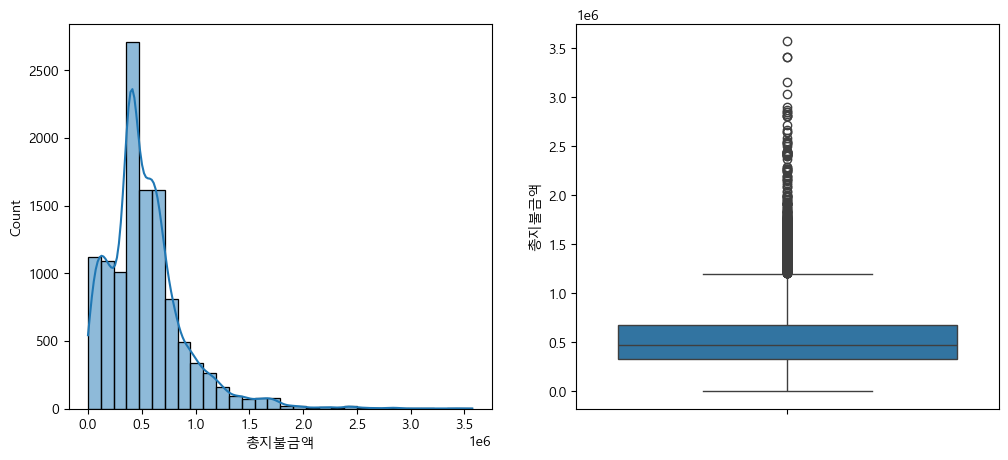

In [121]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
fig, axes = plt.subplots(1,2, figsize = (12, 5))

sns.histplot(data['총지불금액'], bins = 30, kde = True, ax=axes[0])
sns.boxplot(data=data, y='총지불금액', ax=axes[1])
plt.show()

In [122]:
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)

q1 = data['총지불금액'].quantile(0.25)
q3 = data['총지불금액'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5 * iqr

upper_count = len(data[data['총지불금액'] > upper])
print('upper', upper_count , upper_count / len(data))

print(data['총지불금액'].describe())

upper 561 0.048195876288659796
count    1.164000e+04
mean     5.334346e+05
std      3.618219e+05
min      0.000000e+00
25%      3.250000e+05
50%      4.680000e+05
75%      6.760000e+05
max      3.573000e+06
Name: 총지불금액, dtype: float64


<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [123]:
# 10^5 : 만원 -> 평균 5만원 금액을 지불하지만, 최대 30만원까지 지불하는 사람들이 있음 / 이상치(6만7천원)이상의 값을 지불하는 비율은 약 4.8%다

# **4. Mission 1-변수 탐색 결론**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요

<font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

# <b>Mission 1 완료!
수고하셨습니다!

# 📘 데이터전처리
---

# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 2. 데이터 전처리**

### [미션 이해하기]
* 여러분들은 K 보험사의 직원입니다. K 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 2 목표<b>: 군집분석을 기반으로 하는 고객 segment 적용 전 주요 데이터 전처리를 수행해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
* [필요시] 구글 colab 설정 방법
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Path
# path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. 범주 인코딩
    * 각 범주별 0, 1로 인코딩 하기
2. 스케일링


---------------------------------------------------------------------------------------------
# **1. 범주 인코딩**
* 범주형 변수 값(텍스트) 을 수치형 값(숫자)으로 변환하는 방법을 사용하여 알고리즘이 인식할 수 있도록 변환해 봅시다.
* 범주 인코딩 방법은 Label-encoding 과 one-hot-encoding 등이 있습니다.
    * Label-encoding : 0, 1, 2, 3, ...
    * one-hot-encoding : 가변수화
* 우리는 어떻게 범주 인코딩을 할 수 있을까요?

## **(1) 데이터 불러오기**


In [30]:
#[문제 1] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

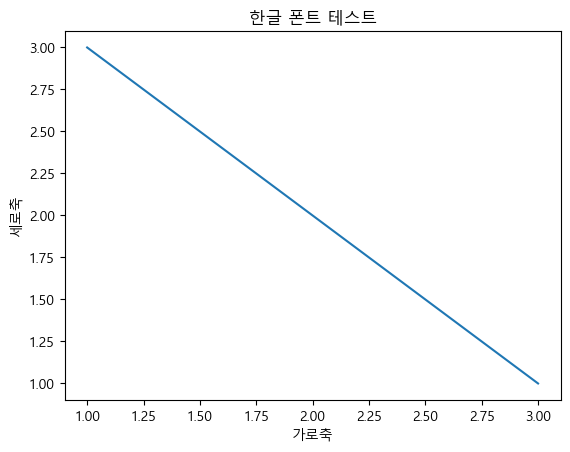

In [31]:
# 한글 세팅

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Windows용 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 확인용 그래프
plt.plot([1, 2, 3], [3, 2, 1])
plt.title("한글 폰트 테스트")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.show()

In [32]:
# [문제 2] 데이터 불러오기
# data 변수에 'customers_seg.csv' 파일을 불러오기

data = pd.read_csv('customers_seg.csv')

In [33]:
# [문제 3] 데이터 상위 5개 조회

data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


## **(2) 활용할 변수 선정하기**

In [34]:
# [문제 4] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.(columns로 확인)

data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [35]:
# [문제 5] mission 1에서 선정한 11개의 변수만 가지고 있는 데이터 프레임 생성하기

# 1. data를 data_choice 변수에 copy 해놓기

data_choice = data.copy()

# 2. col 에 선정한 11개 변수를 리스트로 할당해보자.
# [참고] 11개 변수: 'AGE', '고용상태', 'Willingness to pay/Stay', '상품타입',
# '교육수준', '소득', '월 납입액','타 상품 보유 현황', '총지불금액', '거주지사이즈','자동차'

col = ['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입','교육수준', '소득',
       '월 납입액','타 상품 보유 현황', '총지불금액', '거주지사이즈','자동차']

# 3.data_choice 변수에 col 할당 후 data_choice 데이터를 확인해보자.

data_choice = data[col]
data_choice


,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,무직,2.616381,기본,대학졸업,0,80,1,631000,소,일반세단
1,1,고용,6.352530,기본,고졸이하,102887400,80,4이상,54000,중,일반세단
2,2,휴직,4.974354,기본,대학졸업,22159500,60,4이상,362000,중,일반세단
3,5,고용,13.480284,고급,고졸이하,51562500,110,2,1264000,대,컴팩트카
4,4,고용,9.776436,기본,석사,26820200,120,3,947000,중,SUV
...,...,...,...,...,...,...,...,...,...,...,...
11995,1,고용,25.985100,기본,대학졸업,86451000,70,2,245000,중,일반세단
11996,3,고용,3.441000,중급,대학졸업,25962000,80,1,468000,중,일반세단
11997,3,무직,9.057600,중급,대학졸업,0,90,2,977000,중,일반세단
11998,4,고용,8.347200,중급,대학졸업,26366000,100,3,854000,대,일반세단


## **(3) 범주 인코딩**

**[명목형(텍스트) 컬럼 처리하기]**
   * 순서의 의미가 없는 컬럼은 인코딩 시 주의! 변수의 의미를 고려하여 처리가 필요하다.
   * Mission 1에서 변수마다 탐색적 분석을 통해 의미를 찾아본 것을 활용해야한다.
   * 우리는 1 또는 0으로 이산화(두개의 범주로 구분)를 해보려고 한다.

In [36]:
# [문제 6] 범주형 변수가 무엇이 있는지 확인해보자(info 활용)

data_choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  object 
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  object 
 4   교육수준                     12000 non-null  object 
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  object 
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  object 
 10  자동차                      12000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


---------------------------

**[Hint]**
- **<b>'고용상태', '상품 타입', '교육수준','거주지 사이즈','자동차'</b>** 는 다중범주로 순서에 의미가 없어 변수의 의미를 고려해서  <font color="1E90FF"><b>0과 1로 이산화로 범주 인코딩</font>
- **'타 상품 보유 현황'** 의 경우 숫자로 되어있는 범주에 <font color="1E90FF"><b>'4이상'의 범주의 '이상'이라는 문자열 제거</font>

---------------

### **1) 고용상태**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>

* 1-> 직업을 가지고 있으면서 소득이 발생하는 범주
* 0-> 직업이 없거나, 소득이 발생하지 않는 범주
* 특이하게 false 값 도 존재 하기 때문에 확인 필요

In [37]:
# [문제 7] '고용상태' 범주 종류 확인(.unique() 혹은 .value_counts())
print(data_choice['고용상태'].unique())

data_choice['고용상태'] = np.where(data_choice['고용상태'] == '고용', 1, 0)

print(data_choice['고용상태'].unique())

['무직' '고용' '휴직' 'FALSE']
[0 1]


C:\Users\User\AppData\Local\Temp\ipykernel_9516\3584843477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['고용상태'] = np.where(data_choice['고용상태'] == '고용', 1, 0)


In [38]:
# [같이 하기]'고용상태' 범주를 인코딩 해보기
# np.where 을 이용해서 조건에 따른 값으로 변환하기
# 고용상태가 '고용' 이면 1, 아니면 0

# data_choice['고용상태'] = np.where(data_choice['고용상태'] == '고용', 1, 0)

In [39]:
#[같이 하기] '고용상태'가 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,기본,대학졸업,0,80,1,631000,소,일반세단
1,1,1,6.352530,기본,고졸이하,102887400,80,4이상,54000,중,일반세단
2,2,0,4.974354,기본,대학졸업,22159500,60,4이상,362000,중,일반세단
3,5,1,13.480284,고급,고졸이하,51562500,110,2,1264000,대,컴팩트카
4,4,1,9.776436,기본,석사,26820200,120,3,947000,중,SUV


<b> why? Labelencoding 과 one-hot-encoding을 안하는가?
   > Label encoding을 하면 범주 수에 따라서 0~n 까지 나눠지기 때문에 이진의 의미를 할 수가 없다. (ex.고용상태 기준 --> false 0, 고용1, 무직2, 휴직3)
    <br> 연속적수치값으로 변환하는데 수치적 의미가 차이가 없고 3개 이상 범주는 주의해서 사용해야한다.
    <br> one-hot-encoding은 범주형 변수를 k개 변수로 변환하는데 범주수 만큼 열이 확대가 되어서...컨트롤하고 분석하기가 힘들다
    <br>가끔 이런 단순한 방법이 더 좋을 때도 있다( 간단하게 분석하는 경우...)

### **2) 상품타입**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>

* 1-> 약 9%를 가지고 있는 고급형
* 0-> 약 91%를 가지고 있는 기본, 중급형
* 고급형을 가지고 있는 집단과, 그 외 집단으로 분류

In [40]:
# [문제 8] '상품타입' 범주와 비율 확인

print(data_choice['상품타입'].unique())
data_choice['상품타입'].value_counts()


['기본' '고급' '중급']


상품타입
기본    7278
중급    3647
고급    1075
Name: count, dtype: int64

In [41]:
# [문제 9]'상품타입'범주를 인코딩 해보기
# '상품타입'이 '고급' 1, 아니면 0

data_choice['상품타입'] = np.where(data_choice['상품타입'] == '고급', 1, 0)
data_choice.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9516\2752754793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['상품타입'] = np.where(data_choice['상품타입'] == '고급', 1, 0)


,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,대학졸업,0,80,1,631000,소,일반세단
1,1,1,6.352530,0,고졸이하,102887400,80,4이상,54000,중,일반세단
2,2,0,4.974354,0,대학졸업,22159500,60,4이상,362000,중,일반세단
3,5,1,13.480284,1,고졸이하,51562500,110,2,1264000,대,컴팩트카
4,4,1,9.776436,0,석사,26820200,120,3,947000,중,SUV


In [42]:
#[문제 10] '상품타입'이 변환된 것을 확인해보기
data_choice['상품타입'].value_counts()


상품타입
0    10925
1     1075
Name: count, dtype: int64

### **3) 교육수준**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 12%를 가지고 있는 석/박사
* 0-> 약 88%의 비중을 가지고 있는 고졸이하, 대학졸업자
* 교육수준이 높은 집단과, 그 외 집단으로 분류할 수 있을 것 같음

In [43]:
#[문제 11] '교육수준' 범주와 비율 확인

print(data_choice['교육수준'].unique())
data_choice['교육수준'].value_counts()

['대학졸업' '고졸이하' '석사' '박사']


교육수준
대학졸업    7105
고졸이하    3477
석사       979
박사       439
Name: count, dtype: int64

In [44]:
#[문제 12]'교육수준' 범주를 인코딩 해보기
# '교육수준'이 '석사' 혹은 '박사'이면 1, 아니면 0
data_choice['교육수준'] = np.where(data_choice['교육수준'].isin(['석사', '박사']), 1, 0)
data_choice.head()


C:\Users\User\AppData\Local\Temp\ipykernel_9516\2850009250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['교육수준'] = np.where(data_choice['교육수준'].isin(['석사', '박사']), 1, 0)


,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,0,0,80,1,631000,소,일반세단
1,1,1,6.352530,0,0,102887400,80,4이상,54000,중,일반세단
2,2,0,4.974354,0,0,22159500,60,4이상,362000,중,일반세단
3,5,1,13.480284,1,0,51562500,110,2,1264000,대,컴팩트카
4,4,1,9.776436,0,1,26820200,120,3,947000,중,SUV


In [45]:
#[문제 13] '교육수준'이 변환된 것을 확인해보기
data_choice['교육수준'].value_counts()


교육수준
0    10582
1     1418
Name: count, dtype: int64

### **4) 타 상품 보유 현황**
<font color="1E90FF"><b>★ 범주의 1-4까지가 의미를 가지는 범주를 인코딩 해보자.</font>
* 4 이상의 타상품 보유하는 경우 유의미한 데이터로 가질 수 있어 순서의 의미를 살려서 인코딩 진행

In [46]:
#[문제 14] '타 상품 보유 현황' 범주와 비율 확인

data_choice['타 상품 보유 현황'].value_counts()

타 상품 보유 현황
1      4283
4이상    3155
2      3017
3      1545
Name: count, dtype: int64

In [49]:
# [문제 15] 문자열 제거 하기
# '타 상품 보유 현황'은 숫자형 이지만, 4이상의 '이상'이라는 문자열을 제거해서 정리가 필요
# np.where를 이용해서 '이상'을 제거해 봅시다.

data_choice['타 상품 보유 현황'] = data_choice['타 상품 보유 현황'].replace('4이상', '4').astype(int)

data_choice

C:\Users\User\AppData\Local\Temp\ipykernel_9516\1434683789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['타 상품 보유 현황'] = data_choice['타 상품 보유 현황'].replace('4이상', '4').astype(int)


,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,0,0,80,1,631000,소,일반세단
1,1,1,6.352530,0,0,102887400,80,4,54000,중,일반세단
2,2,0,4.974354,0,0,22159500,60,4,362000,중,일반세단
3,5,1,13.480284,1,0,51562500,110,2,1264000,대,컴팩트카
4,4,1,9.776436,0,1,26820200,120,3,947000,중,SUV
...,...,...,...,...,...,...,...,...,...,...,...
11995,1,1,25.985100,0,0,86451000,70,2,245000,중,일반세단
11996,3,1,3.441000,0,0,25962000,80,1,468000,중,일반세단
11997,3,0,9.057600,0,0,0,90,2,977000,중,일반세단
11998,4,1,8.347200,0,0,26366000,100,3,854000,대,일반세단


In [51]:
#[문제 16]'타 상품 보유 현황'이 변환된 것을 확인해보기

data_choice['타 상품 보유 현황'].value_counts()

타 상품 보유 현황
1    4283
4    3155
2    3017
3    1545
Name: count, dtype: int64

### **5) 거주지 사이즈**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 10%를 가지고 있는 거주지 대
* 0-> 약 90%를 가지고 있는 중,소
* 거주지의 사이즈가 대로 가지고 있는 집단과, 그 외 집단으로 분류할 수 있을 것 같음

In [53]:
#[문제 17] '거주지사이즈' 범주와 비율 확인

data_choice['거주지사이즈'].value_counts()

거주지사이즈
중    8423
소    2332
대    1245
Name: count, dtype: int64

In [54]:
#[문제 18]'거주지사이즈' 범주를 인코딩 해보기
# '대'를 1, 나머지를 0

data_choice['거주지사이즈'] = np.where(data_choice['거주지사이즈'] == '대', 1, 0)
data_choice

C:\Users\User\AppData\Local\Temp\ipykernel_9516\2430473102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['거주지사이즈'] = np.where(data_choice['거주지사이즈'] == '대', 1, 0)


,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,0,0,80,1,631000,0,일반세단
1,1,1,6.352530,0,0,102887400,80,4,54000,0,일반세단
2,2,0,4.974354,0,0,22159500,60,4,362000,0,일반세단
3,5,1,13.480284,1,0,51562500,110,2,1264000,1,컴팩트카
4,4,1,9.776436,0,1,26820200,120,3,947000,0,SUV
...,...,...,...,...,...,...,...,...,...,...,...
11995,1,1,25.985100,0,0,86451000,70,2,245000,0,일반세단
11996,3,1,3.441000,0,0,25962000,80,1,468000,0,일반세단
11997,3,0,9.057600,0,0,0,90,2,977000,0,일반세단
11998,4,1,8.347200,0,0,26366000,100,3,854000,1,일반세단


In [56]:
#[문제 19]'거주지사이즈'가 변환된 것을 확인해보기
data_choice['거주지사이즈'].value_counts()

거주지사이즈
0    10755
1     1245
Name: count, dtype: int64

### **6) 자동차**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 9%를 가지고 있는 고급차/스포츠카
* 0-> 약 91%를 가지고 있는 그외(일반세단, 컴팩트카,suv)
* 고급형(고급차.스포츠카)와 그 외의 집단으로 분류할 수 있을 것 같음(소득에 연관)

In [57]:
#[문제 20] '자동차' 범주와 비율 확인

data_choice['자동차'].value_counts()

자동차
일반세단    6074
컴팩트카    2484
SUV     2336
스포츠카     652
고급차      454
Name: count, dtype: int64

In [58]:
#[문제 21]'자동차' 범주를 인코딩 해보기
# 고급차,스포츠카를 1로. 나머지는 0

data_choice['자동차'] = np.where(data_choice['자동차'].isin(['고급차', '스포츠카']), 1, 0)
data_choice.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9516\2300504767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['자동차'] = np.where(data_choice['자동차'].isin(['고급차', '스포츠카']), 1, 0)


,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,0,0,80,1,631000,0,0
1,1,1,6.352530,0,0,102887400,80,4,54000,0,0
2,2,0,4.974354,0,0,22159500,60,4,362000,0,0
3,5,1,13.480284,1,0,51562500,110,2,1264000,1,0
4,4,1,9.776436,0,1,26820200,120,3,947000,0,0


In [59]:
#[문제 22] '자동차'가 변환된 것을 확인해보기

data_choice['자동차'].value_counts()

자동차
0    10894
1     1106
Name: count, dtype: int64

<font color="1E90FF"><b> 범주형(Object) -> 수치형으로 변경 완료!</span>

# **2. 스케일링**
* 컬럼별 수치의 단위가 다른 것을 확인 하였고, 컬럼별 범위를 조정하는 것이 필요한 상황이다.
* 범위를 일원화 시키기 위해서는 스케일링이 필요로 하다.
    * 종류는 'min-max scaling' 과 'standard scaling' 이 있는데 우리는 'standard scaling'을 통해서 변환 해보자.

In [60]:
#[문제 23] standard-scaling을 해보자.
# 1. standard-scaler import!(sklearn의 processing 활용)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 2. scaler라는 변수에  StandardScaler 넣어주기
scaler = StandardScaler()

# 3. 'data_choice'을  fit_transform 하여 'data_sc'로 저장
# 단, 데이터프레임을 스케일링하면, 결과가 넘파이 어레이로 나온다.
# 그래서 데이터프레임으로 다시 변환할 필요가 있다.(이때 칼럼 이름 필요)
scaled = scaler.fit_transform(data_choice)
data_sc = pd.DataFrame(scaled, columns = data_choice.columns)
data_sc.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,-0.070427,-1.295136,-0.810943,-0.313685,-0.366062,-1.242413,-0.472671,-1.078127,0.265939,-0.340235,-0.318628
1,-1.853401,0.772120,-0.325638,-0.313685,-0.366062,1.511484,-0.472671,1.414331,-1.342270,-0.340235,-0.318628
2,-0.961914,-1.295136,-0.504656,-0.313685,-0.366062,-0.649289,-0.943792,1.414331,-0.483815,-0.340235,-0.318628
3,1.712546,0.772120,0.600217,3.187913,-0.366062,0.137715,0.234009,-0.247307,2.030230,2.939142,-0.318628
4,0.821059,0.772120,0.119108,-0.313685,2.731780,-0.524540,0.469570,0.583512,1.146690,-0.340235,-0.318628


In [61]:
# [문제 24] 스케일링이 잘 되었는지 'data_sc' 데이터를 확인해보자

data_sc.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,-0.070427,-1.295136,-0.810943,-0.313685,-0.366062,-1.242413,-0.472671,-1.078127,0.265939,-0.340235,-0.318628
1,-1.853401,0.772120,-0.325638,-0.313685,-0.366062,1.511484,-0.472671,1.414331,-1.342270,-0.340235,-0.318628
2,-0.961914,-1.295136,-0.504656,-0.313685,-0.366062,-0.649289,-0.943792,1.414331,-0.483815,-0.340235,-0.318628
3,1.712546,0.772120,0.600217,3.187913,-0.366062,0.137715,0.234009,-0.247307,2.030230,2.939142,-0.318628
4,0.821059,0.772120,0.119108,-0.313685,2.731780,-0.524540,0.469570,0.583512,1.146690,-0.340235,-0.318628


In [62]:
#[문제 25] 데이터 내보내기
# 2일차에 모델링에 활용하기 위해 내보내기를 해보자.
# data_sc 를 data_sc.csv 파일로 저장(to_csv 활용)
# index=False 파라미터를 설정해 줘야지 unnamed:0번 추가 인덱스가 안생기기에 꼭! 넣어서 저장!

data_sc.to_csv('data_sc.csv', index = False)

In [63]:
#[문제 26] 데이터가 잘 들어갔는지 read_csv 활용해서 'data_sc.csv' 확인

temp_df = pd.read_csv('data_sc.csv')
temp_df

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,-0.070427,-1.295136,-0.810943,-0.313685,-0.366062,-1.242413,-0.472671,-1.078127,0.265939,-0.340235,-0.318628
1,-1.853401,0.772120,-0.325638,-0.313685,-0.366062,1.511484,-0.472671,1.414331,-1.342270,-0.340235,-0.318628
2,-0.961914,-1.295136,-0.504656,-0.313685,-0.366062,-0.649289,-0.943792,1.414331,-0.483815,-0.340235,-0.318628
3,1.712546,0.772120,0.600217,3.187913,-0.366062,0.137715,0.234009,-0.247307,2.030230,2.939142,-0.318628
4,0.821059,0.772120,0.119108,-0.313685,2.731780,-0.524540,0.469570,0.583512,1.146690,-0.340235,-0.318628
...,...,...,...,...,...,...,...,...,...,...,...
11995,-1.853401,0.772120,2.224522,-0.313685,-0.366062,1.071545,-0.708232,-0.247307,-0.809917,-0.340235,-0.318628
11996,-0.070427,0.772120,-0.703830,-0.313685,-0.366062,-0.547511,-0.472671,-1.078127,-0.188373,-0.340235,-0.318628
11997,-0.070427,-1.295136,0.025735,-0.313685,-0.366062,-1.242413,-0.237111,-0.247307,1.230306,-0.340235,-0.318628
11998,0.821059,0.772120,-0.066542,-0.313685,-0.366062,-0.536698,-0.001551,0.583512,0.887482,2.939142,-0.318628


# **3. Mission 2-데이터 전처리 결론**

* 군집화 모델링을 하기 위해 범주형,수치형별 데이터 전처리가 필요했고 전처리 진행 완료
* 범주형은 수치형으로 변환을 하기 위해 인코딩 과정을 진행
* 단위가 각각 다른 수치형을 스케일링을 통해 모델 적용을 위한 기본 셋팅으로 변환

<font color="1E90FF"><b>→ 모델을 돌리기 전 데이터에 대한 이해도를 바탕으로 데이터의 전처리 진행(스케일링)<b><br>  

# <b>Mission 2 완료!
수고하셨습니다!

# 📘 군집 분석
---

# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 3. 분석 모델 개발**

### [미션 이해하기]
* 여러분들은 K 보험사의 직원입니다. K보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[2일차] mission 3 목표<b>: 전처리 한 데이터를 활용하여 군집분석 하고, 데이터 탐색 기반 프로파일링을 통해 군집별 특징 정의 해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
* [필요시] 구글 colab 설정 방법
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Path
# path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. k-means 군집분석
2. 프로파일링

---------------------------------------------------------------------------------------------
# **1. k-means 모델(군집 분석)**

**k-means 모델이란?**
 > **비지도학습의 대표적인 군집분석을 위한 모델로 주어진 데이터를 K개의 클러스터로 묶는 알고리즘**
 > * K 군집의 초기 중심에서 시작해서 중심을 바꾸는 단계를 사용하여 데이터를 가장 가까운 군집으로 포함시켜 분류하는 모델
 > * 장점: 단순 알고리즘 및 빠른 연산 속도
 > * 단점: 이상치, 노이즈에 민감하고 초기 군집 수 결정 단계가 필요함

## **(1) 데이터 불러오기**

In [1]:
# 필요 라이브러리 로딩

import numpy as np
import pandas as pd
import seaborn as sns
import os

# mosaic
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
#(참고)
# from matplotlib import font_manager, rc
# font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

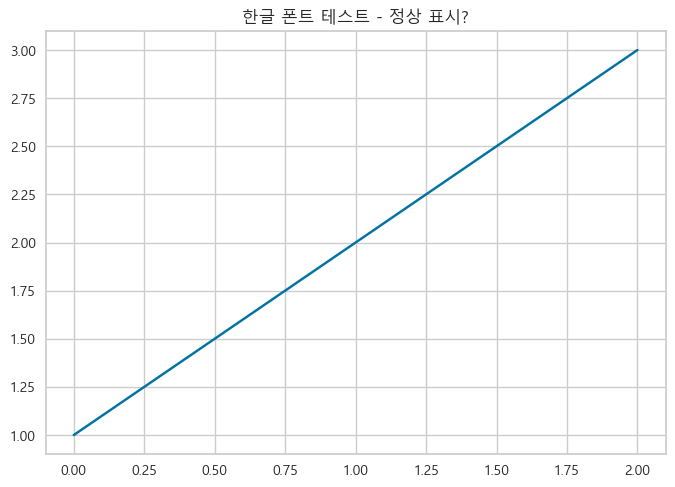

In [25]:
# 한글 세팅 참고 1
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import platform

# 1) 선호 폰트 후보(설치되어 있는 것 위주)
candidates = {
    "Windows": ["Malgun Gothic", "맑은 고딕"]
}

system = platform.system()
fonts_to_try = candidates.get(system, []) + ["NanumGothic"]  # 최후 fallback

# 2) 폰트가 실제로 있는지 검사 후 적용
available = set(f.name for f in fm.fontManager.ttflist)
for name in fonts_to_try:
    if name in available:
        mpl.rcParams["font.family"] = name
        break

# 3) 마이너스 깨짐 방지
mpl.rcParams["axes.unicode_minus"] = False

# 테스트
plt.plot([1,2,3])
plt.title("한글 폰트 테스트 - 정상 표시?")
plt.show()

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

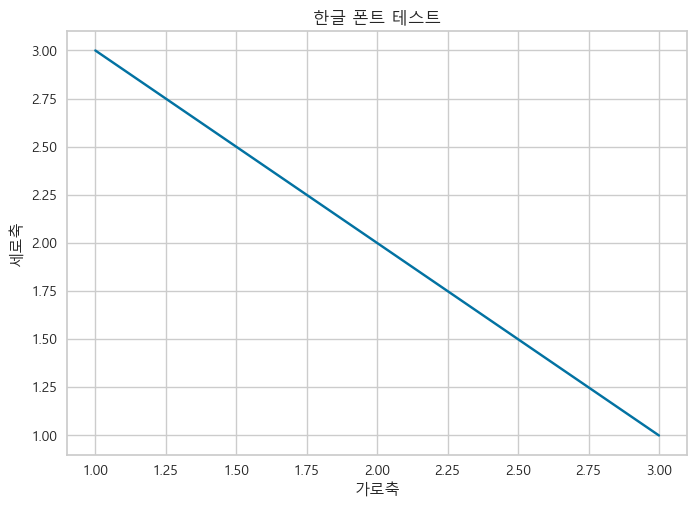

In [26]:
# 한글 세팅 참고 2

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Windows용 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 지수표현(소수점 2자리까지 나타내기)
pd.options.display.float_format = '{:.2f}'.format

# 확인용 그래프
plt.plot([1, 2, 3], [3, 2, 1])
plt.title("한글 폰트 테스트")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.show()

In [27]:
# [문제 1~2] 스케일링 한 데이터 불러오기
# 1. data 변수에 'data_sc.csv' 파일을 불러와서 할당
# 2. data 변수 호출해서 상위 5개 확인해보기

#[참고] colab으로 진행할 때
#data = pd.read_csv(path+'customers_seg.csv')

## **(2) 군집분석**

<b>군집분석을 위해 최적의 그룹 k 값을 찾아보고 최적의 군집 수를 결정해 보자

### <b>**1) 기본 셋팅**
* yellowbrick을 임포트 해서 군집분석 해보기

In [ ]:
#[같이 하기] yellowbrick이 없는 경우 pip로 설치해 주기(!pip install yellowbrick)

!pip install yellowbrick

In [4]:
# [같이 하기] k-means, yellowbrick의 KElbowVisualizer 불러오기

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### <b>**2) 직접 하나하나 해보기**
* 몇 개의 그룹으로 군집화를 할지 k 값을 바꿔 가면서 '최적의 k 값'을 찾아보는 것을 해보자.

In [5]:
data = pd.read_csv('data_sc.csv')

In [6]:
# [같이 하기] 군집화할 그룹(k) 결정하기

# 우리는 먼저 몇개의 그룹으로 군집화 할지 3~10까지 수 중에서 결정하려고 3부터 2씩 올려서 클러스터링을 해보려고 한다.
# 그러면 3개의 그룹부터 시작해 보자.


# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k에 할당)
k=3

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용)
# 동일값을 위해 random_state=2024, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_1 = KMeans(n_clusters=k, random_state=2025,n_init=10)

#3. 스케일링 된 데이터에 학습

model_1.fit(data)


,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,2025
,copy_x,True
,algorithm,'lloyd'


In [7]:
# [같이 하기] 모델이 찾은 3개의 센트로이드를 확인해보자.
# 센트로이드는 하나의 클러스터(k) 내 데이터의 중심이 되는 점이다.

model_1.cluster_centers_

array([[ 4.91209295e-01, -1.86052996e-02,  9.62935389e-01,
         3.83716786e-01,  3.14947262e-02, -9.89694590e-02,
         1.96321817e+00,  2.17695394e-02,  1.32727947e+00,
        -9.56484995e-03,  2.78122449e+00],
       [-1.79328857e-02,  7.72119935e-01, -8.48604407e-02,
        -4.13497939e-02,  6.59720852e-02,  6.26869027e-01,
        -2.29706328e-01, -3.86311266e-03, -3.88547151e-01,
        -1.83956795e-02, -3.04852679e-01],
       [-1.16286759e-01, -1.29462185e+00, -1.44261461e-01,
        -4.47996867e-02, -1.20482237e-01, -1.02606888e+00,
        -1.98651027e-01,  1.31719920e-05,  2.58464247e-01,
         3.38287635e-02, -3.16050607e-01]])

In [8]:
# [같이 하기] 3가지 성능지표를 통해서 확인해보기

# 1. inertia(이너셔) : 각 데이터와 센트로이드(중심) 사이의 평균 제곱거리로 도출한 모델 (model.inertia_로 쓴다)
# 2. score 매서드: 이너셔의 음수값을 반환( model.score(df))

print(model_1.inertia_)
print(model_1.score(data))

93558.90153906902
-93558.90153906902


<b> k=3을 같이 해봤으니 이제 여러분들이 한번 그룹수(k)를 바꿔가면서 판단을 해보실 차례입니다!
<br>2씩 늘려가면서 k값을 5,7,9개의 그룹으로 나눠서 모델 학습 시키고 성능지표를 확인해 보세요!

In [9]:
#[문제 3] 군집화할 그룹(k)을 5개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k1에 할당)
k1= 5

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_2 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_2 = KMeans(n_clusters = k1, random_state=2025, n_init = 10)

#3. 스케일링 된 데이터에 학습
model_2.fit(data)


#4. 학습한 결과 inertia,score 로 확인 해보기
model_2.inertia_,  model_2.score(data)


(74060.0539903439, -74060.0539903439)

In [10]:
#[문제 4] 군집화할 그룹(k)을 7개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k2에 할당)

k2= 7

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_3 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_3 = KMeans(n_clusters = k2, random_state = 2025, n_init = 10)

#3. 스케일링 된 데이터에 학습
model_3.fit(data)


#4. 학습한 결과 inertia,score 로 확인 해보기
model_3.inertia_, model_3.score(data)


(60263.5162337401, -60263.5162337401)

In [11]:
#[문제 5] 군집화할 그룹(k)을 9개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k3에 할당)

k3= 9

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_4 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_4 =KMeans(n_clusters = k3, random_state = 2025, n_init=10)

#3. 스케일링 된 데이터에 학습
model_4.fit(data)


#4. 학습한 결과 inertia,score 로 확인 해보기
model_4.inertia_, model_4.score(data)



(53248.239921635526, -53248.239921635526)

-----------

* <b>for 문을 활용해서 그래프로도 확인을 해볼까요?

n_cluster:2, inertia:110875.68041316455
---------
n_cluster:3, inertia:93558.90153906902
---------
n_cluster:4, inertia:83453.68681059695
---------
n_cluster:5, inertia:74060.0539903439
---------
n_cluster:6, inertia:66665.67312126086
---------
n_cluster:7, inertia:60263.5162337401
---------
n_cluster:8, inertia:56978.148417056254
---------
n_cluster:9, inertia:53248.239921635526
---------
n_cluster:10, inertia:50603.09346179726
---------
n_cluster:11, inertia:48751.3848650262
---------
n_cluster:12, inertia:46241.18302844306
---------
n_cluster:13, inertia:44209.198153010366
---------
n_cluster:14, inertia:42661.76625642237
---------
n_cluster:15, inertia:41064.04436607587
---------
n_cluster:16, inertia:39567.08557005088
---------
n_cluster:17, inertia:38802.208615130105
---------
n_cluster:18, inertia:37494.07937045377
---------
n_cluster:19, inertia:36252.97943772257
---------
n_cluster:20, inertia:35128.76261638358
---------


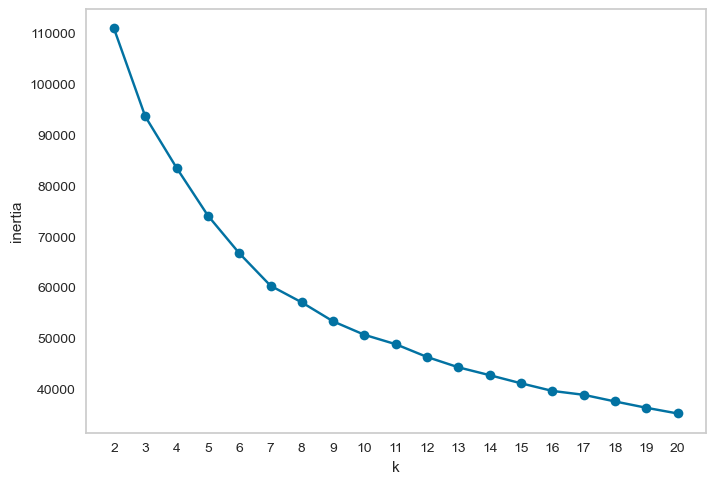

In [12]:
#[문제 6] for 문을 활용해서 2~20까지 k값을 넣어서 성능지표 확인하기

ks=  range(2, 21)        # k값 범위 지정(range 활용) 후 ks 변수에 할당
inertias = []  # 이너셔 결과를 저장하기 위한 빈 리스트 생성 (변수명 inertias)

for  k in  ks : # for문 활용
    model = KMeans(n_clusters = k, random_state = 2025, n_init= 10)       # k-means 모델 만들기(그룹수 : n_clusters 파라미터 사용,n_init=10)
    model.fit(data) # 모델 학습
    inertias.append(model.inertia_)              # 이너셔 결과를 inertias 리스트에 계속 저장(append 활용)
    print('n_cluster:{}, inertia:{}'.format(k, model.inertia_))
    print('---------') # n_cluster, inertia 결과 출력


plt.Figure(figsize=(15,6))
plt.plot(ks,inertias,'-o') # '-o'는 실선과 원을 같이 시각화
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.grid()
plt.show()

여기서는 확실하게 어떤 k 값이 좋은지 파악하기가 힘들긴 하네요

### <b>**3) Elbow Method 활용해서 k 값 구하기**
* yellowbrick의 k-Elbow Mehod를 활용해서 최적의 k 값을 구하기(k값 결정하기 쉽게 도와주는 함수)

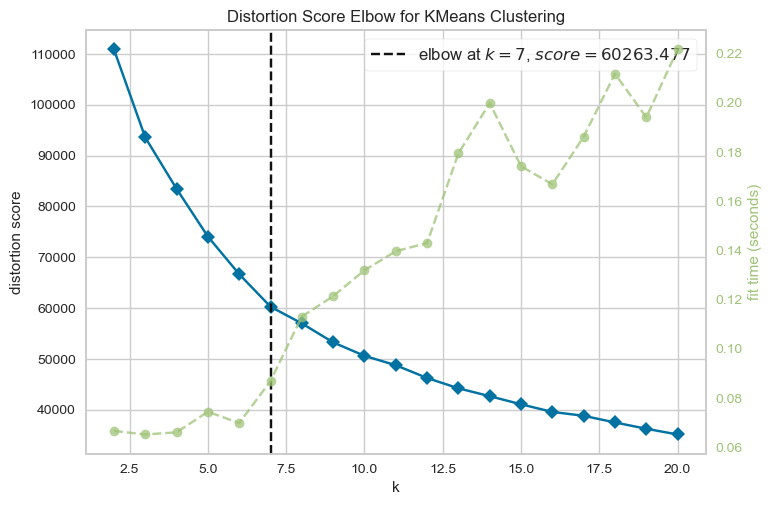

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
#[문제 7] Elbow Method를 통해 최적의 군집 수 도출을 해보자.

# 1. 모델 선언하기(random_state=2025, n_init = 10 으로 설정)(model_E로 할당)

model_E = KMeans(random_state = 2025, n_init = 10)

# 2. KElbowVisualizer 에 k-means 모델과 k값 넣어서 만들기(Elbow_M 에 할당)
# k값은 k=(2,21)사이의 값중에서 찾는 것으로 넣으면 된다.

Elbow_M = KElbowVisualizer(model_E, k = (2, 21))

# 3. Elbow 모델 학습하기(fit)

Elbow_M.fit(data)


# 4. Elbow 모델 확인하기(show()활용)
Elbow_M.show()


### <b>**4) 최적의 k 값으로 모델링**
* Elbow Method를 통해 나온 최적의 k값으로 모델링을 해보자.

In [19]:
# [문제 8] 원본 데이터('customers_seg.csv') 불러오기

# 1. scale이 안된 원본 data에 clust를 맵핑 시키기 위해 원본 데이터('customers_seg.csv')도 불러옵시다
# data0 라는 변수에 할당하기
data0 = pd.read_csv('customers_seg.csv')

# 2. 'CID'는 활용하지 않을 예정으로 삭제합니다.
data0.drop('CID', axis = 1, inplace = True)

# 3. 데이터 상위 5개 확인하기
data0.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,3,피보험자,무직,1,2.62,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,1,계약자,고용,0,6.35,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,2,계약자,휴직,0,4.97,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,5,계약자,고용,1,13.48,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,4,계약자,고용,0,9.78,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [20]:
# [문제 9] 최적의 k 값으로 k-means 모델을 구성해보자.

#1.최적의 k 값으로 군집 수 선택 (k4에 할당)
k4=7

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_B 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_B = KMeans(n_clusters = k4, random_state = 2025, n_init = 10)

#3. 스케일링 된 데이터에 학습
model_B.fit(data)


#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장(.predict)

cluster =model_B.predict(data)

In [21]:
# [문제 10] 예측결과와 원본 데이터 합치기

#1. 예측 결과를 데이터프레임으로 만들고

cluster = pd.DataFrame(cluster, columns = ['cluster'])


#2. 원본 데이터와 합쳐서, result로 저장 --> ()안에 작성해보기!

result = pd.concat([data0, cluster], axis = 1 )

#3. 예측 결과는 카테고리 타입으로 변경
result['cluster'] = pd.Categorical(result['cluster'] )
result.head()

#4. 결과 저장 --> 코드 마무리!
result.head()


,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,...,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,cluster
0,3,피보험자,무직,1,2.62,0,기본,대학졸업,0,도시근교,...,80,0,1,자주방문,없음,자사영업,631000,일반세단,소,1
1,1,계약자,고용,0,6.35,0,기본,고졸이하,102887400,시골,...,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,3
2,2,계약자,휴직,0,4.97,0,기본,대학졸업,22159500,도시근교,...,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중,1
3,5,계약자,고용,1,13.48,0,고급,고졸이하,51562500,도시근교,...,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,2
4,4,계약자,고용,0,9.78,0,기본,석사,26820200,도시근교,...,120,0,3,비방문,없음,대리점,947000,SUV,중,5


<b> 각 고객별로 군집 된 번호가 데이터 프레임에 생성한 것을 볼 수 있습니다! 다 왔습니다!

* 이제부터 조별 과제를 수행합니다.
    * 조 내에서 최적의 K값으로 군집을 수행한 결과(result)를 하나 선정해서
    * 모든 조원들이 동일한 데이터를 로딩하고
    * 프로파일링을 시작합니다.


---------------------------------------------------------------------------------------------
# **2. 프로파일링**

<b>프로파일링 이란?
> <b>군집의 구조와 내용을 분석하고 도메인 및 현업업무의 '추론'을 바탕으로 분석의 결과를 적용 가능하도록 하는 과정. 데이터를 통해서 군집별 특성을 파악하는 것에 목적은 두는 기법

<font color="1E90FF"><b>★ 프로파일링을 위해 군집간의 차이를 도메인 및 업무 관점으로 해석해야한다.</font>

* 우리는 총 20개의 컬럼을 clust 별로 업무관점으로 해석하고 정리가 필요하다.
  <br>* 범주형/수치형 데이터 별로도 특징과 해석방법이 조금 다르다
  <br>* [선택] 개인별로 대략 6개 이상 변수에 대한 군집간 차이 분석해보기!(하나의 변수당 2명 이상이 분석 수행해야 비교가 된다!)

* 도메인 지식을 총 동원 해서 각 컬럼의 clust 별 인사이트를 도출 해 보자!

## **(1) 컬럼 확인해보기**

In [22]:
#[문제 11~12] result에 대해 info를 통해서 범주형/수치형 데이터 확인해보고 어떤 컬럼들이 있었는지 확인
# 1. 데이터 불러오기(조에서 하나의 결과를 선정해서 공유)

display(result.head())
# 2. info로 확인하기
result.info()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,...,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,cluster
0,3,피보험자,무직,1,2.62,0,기본,대학졸업,0,도시근교,...,80,0,1,자주방문,없음,자사영업,631000,일반세단,소,1
1,1,계약자,고용,0,6.35,0,기본,고졸이하,102887400,시골,...,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,3
2,2,계약자,휴직,0,4.97,0,기본,대학졸업,22159500,도시근교,...,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중,1
3,5,계약자,고용,1,13.48,0,고급,고졸이하,51562500,도시근교,...,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,2
4,4,계약자,고용,0,9.78,0,기본,석사,26820200,도시근교,...,120,0,3,비방문,없음,대리점,947000,SUV,중,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AGE                      12000 non-null  int64   
 1   등록(계/피)                  12000 non-null  object  
 2   고용상태                     12000 non-null  object  
 3   성별                       12000 non-null  int64   
 4   Willingness to pay/Stay  12000 non-null  float64 
 5   갱신                       12000 non-null  int64   
 6   상품타입                     12000 non-null  object  
 7   교육수준                     12000 non-null  object  
 8   소득                       12000 non-null  int64   
 9   지역                       12000 non-null  object  
 10  결혼여부                     12000 non-null  object  
 11  월 납입액                    12000 non-null  int64   
 12  VOC                      12000 non-null  int64   
 13  타 상품 보유 현황               12000 non-null  object  
 14  온라인방문빈

<b>cluster 컬럼을 제외하고 그 다음 컬럼인 age 부터 차례대로 군집간의 차이를 업무관점으로 해석해 보기!

[tip]
* 범주형으로 되어있는 컬럼과 수치형으로 되어있는 컬럼이 해석하는 방법이 다르다.
* 컬럼이 어떤 컬럼인지 확인해보고 특징들을 파악해보자.

----------

### **1) AGE**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
AGE,,,,,,,,,,,,,,,,
1,149,0,88,1017,0,177,23,1454,0.14,0.00,0.09,0.64,0.00,0.16,0.02,0.12
2,142,480,108,572,0,163,73,1538,0.13,0.16,0.11,0.36,0.00,0.15,0.07,0.13
3,484,2223,337,0,980,367,384,4775,0.45,0.74,0.35,0.00,0.30,0.34,0.39,0.40
4,250,316,220,0,1767,308,263,3124,0.23,0.10,0.23,0.00,0.54,0.28,0.27,0.26
5,54,0,187,0,547,64,205,1057,0.05,0.00,0.20,0.00,0.17,0.06,0.21,0.09
6,0,0,11,0,11,1,29,52,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


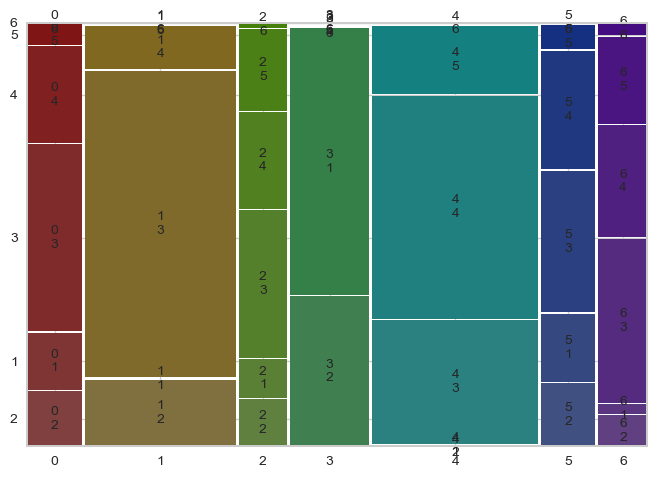

In [23]:
# [같이 하기] 'Age' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
# crosstab의 margins='True'을 활용하면 행 합, 열 합을 추가할 수 있다.
# pro_df 변수에 할당해서 확인해보자.

feature = 'AGE'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

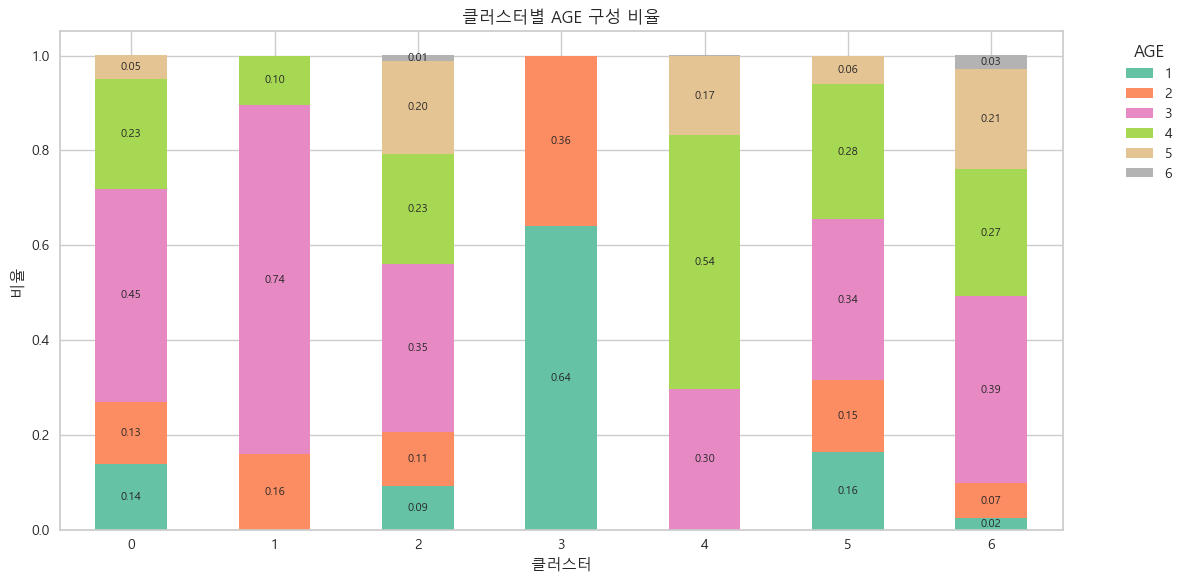

In [31]:
#시각화 샘플 2(subplots)

# 1. 교차표 생성 (행: 클러스터, 열: AGE)
cluster_1_ct = pd.crosstab(result['cluster'], result['AGE'])

# 2. 클러스터별 AGE 비율 정규화
normalized_by_cluster = cluster_1_ct.div(cluster_1_ct.sum(axis=1), axis=0).round(3)

# 3. 시각화
fig, ax = plt.subplots(figsize=(12, 6))
bars = normalized_by_cluster.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

# 4. 수치 라벨 추가(참고)
for i, cluster in enumerate(normalized_by_cluster.index):
    cumulative = 0
    for one in normalized_by_cluster.columns:
        value = normalized_by_cluster.loc[cluster, one]
        if value > 0.01:
            ax.text(i, cumulative + value / 2, f"{value:.2f}", ha='center', va='center', fontsize=8)
        cumulative += value

# 5. 그래프 요소 설정
ax.set_title("클러스터별 AGE 구성 비율")
ax.set_xlabel("클러스터")
ax.set_ylabel("비율")
ax.set_xticklabels(normalized_by_cluster.index, rotation=0)
ax.legend(title='AGE', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<b>**'age' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

### **2) 등록(계/피)**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
등록(계/피),,,,,,,,,,,,,,,,
계약자,852,2388,747,1225,2570,875,768,9425,0.79,0.79,0.79,0.77,0.78,0.81,0.79,0.79
피보험자,227,631,204,364,735,205,209,2575,0.21,0.21,0.21,0.23,0.22,0.19,0.21,0.21
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


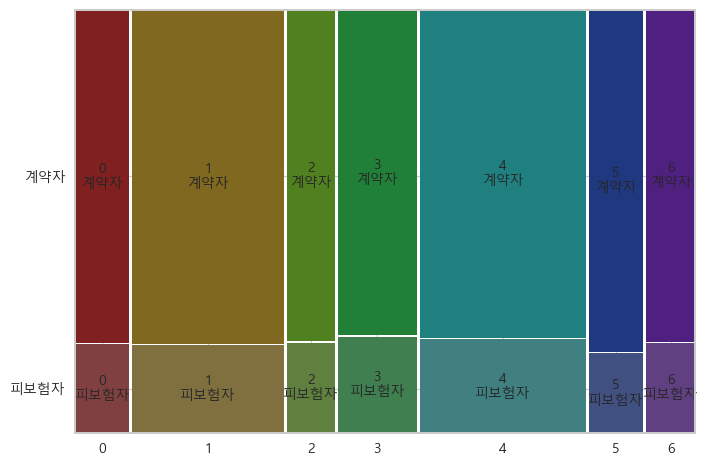

In [32]:
# [문제 13] '등록(계/피)' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '등록(계/피)'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'등록(계/피)' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제 14]

### **3) 성별**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
성별,,,,,,,,,,,,,,,,
0,596,1509,486,816,1710,553,479,6149,0.55,0.50,0.51,0.51,0.52,0.51,0.49,0.51
1,483,1510,465,773,1595,527,498,5851,0.45,0.50,0.49,0.49,0.48,0.49,0.51,0.49
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


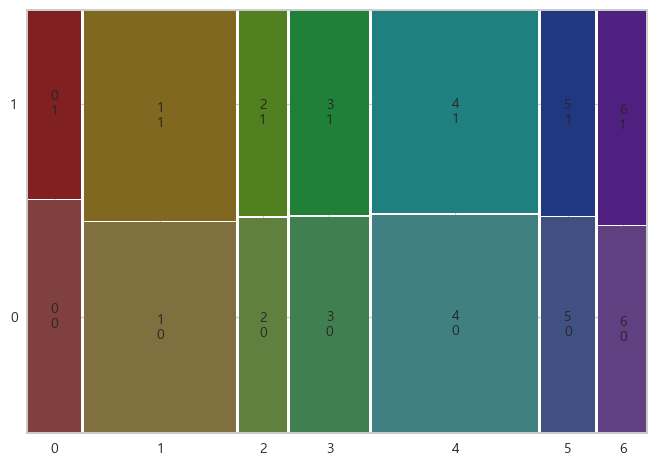

In [33]:
# [문제 15] '성별' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
feature = '성별'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()


<b>**'성별' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제16]

### **4) willingness to pay/stay(수치)**

C:\Users\User\AppData\Local\Temp\ipykernel_10020\2544866404.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))


Willingness to pay/Stay                  
                            max  min  mean median
cluster                                          
0                         51.74 2.09  7.53   5.79
1                         49.69 2.05  7.68   5.67
2                         65.21 3.52 11.63   9.42
3                         54.86 2.47  8.10   6.19
4                         52.35 2.51  8.08   6.16
5                         49.79 2.44  8.22   6.01
6                         92.50 3.41 15.84  11.23

C:\Users\User\AppData\Local\Temp\ipykernel_10020\2544866404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=result, palette='cool')


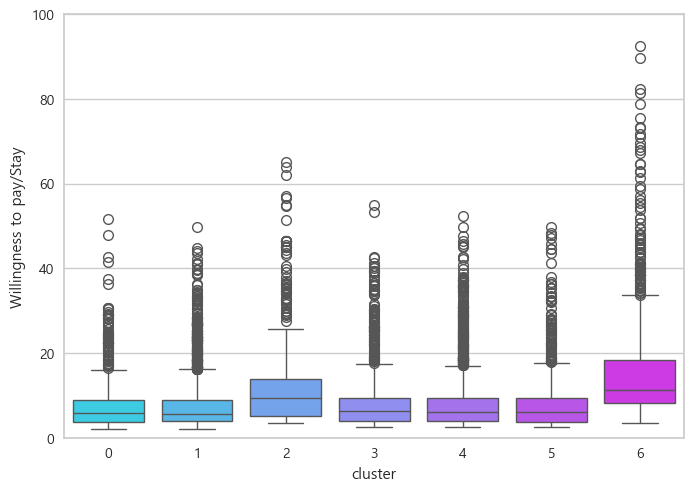

In [35]:
# [같이 하기] WTP의 경우 '보험 유지 기대 확률'로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = 'Willingness to pay/Stay'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))

# 시각화를 해 봅시다.
sns.boxplot(x='cluster', y=feature, data=result, palette='cool')
plt.ylim(0, 100)
plt.show()


<b>**'WTP' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
# [같이 하기]


### **5) 상품 타입**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
상품타입,,,,,,,,,,,,,,,,
고급,1,0,951,0,0,0,123,1075,0.00,0.00,1.00,0.00,0.00,0.00,0.13,0.09
기본,699,2004,0,1123,2210,709,533,7278,0.65,0.66,0.00,0.71,0.67,0.66,0.55,0.61
중급,379,1015,0,466,1095,371,321,3647,0.35,0.34,0.00,0.29,0.33,0.34,0.33,0.30
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


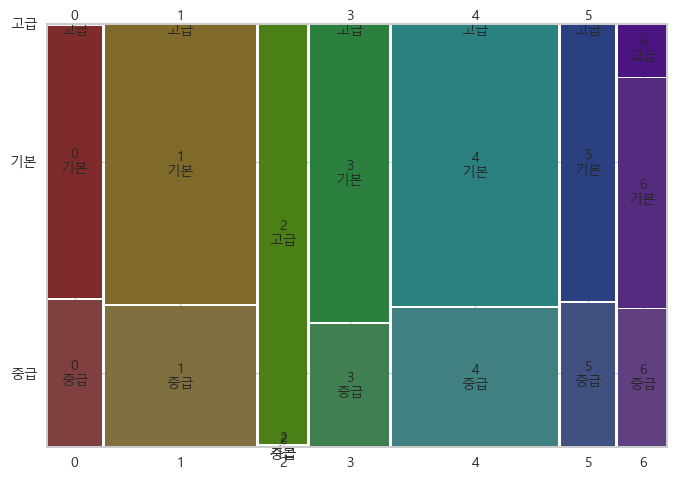

In [36]:
# [문제 17] '상품타입' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '상품타입'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'상품타입' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제18]

### **6) 교육수준**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
교육수준,,,,,,,,,,,,,,,,
고졸이하,333,1031,301,516,961,0,335,3477,0.31,0.34,0.32,0.33,0.29,0.00,0.34,0.29
대학졸업,602,1988,553,1073,2344,0,545,7105,0.56,0.66,0.58,0.68,0.71,0.00,0.56,0.59
박사,40,0,20,0,0,353,26,439,0.04,0.00,0.02,0.00,0.00,0.33,0.03,0.04
석사,104,0,77,0,0,727,71,979,0.10,0.00,0.08,0.00,0.00,0.67,0.07,0.08
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


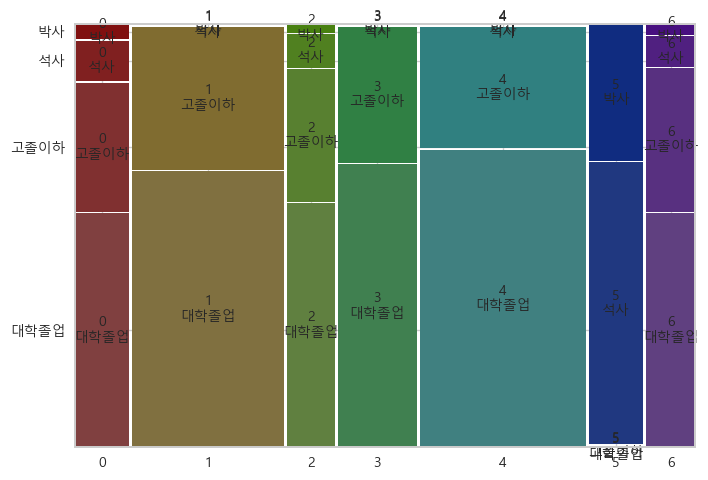

In [37]:
# [문제 19] '교육수준' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '교육수준'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'교육수준' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제20]

### **7) 고용상태**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
고용상태,,,,,,,,,,,,,,,,
FALSE,39,255,6,0,0,27,33,360,0.04,0.08,0.01,0.00,0.00,0.03,0.03,0.03
고용,632,0,611,1589,3305,800,581,7518,0.59,0.00,0.64,1.00,1.00,0.74,0.59,0.63
무직,285,2089,233,0,0,139,282,3028,0.26,0.69,0.24,0.00,0.00,0.13,0.29,0.25
휴직,123,675,101,0,0,114,81,1094,0.11,0.22,0.11,0.00,0.00,0.11,0.08,0.09
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


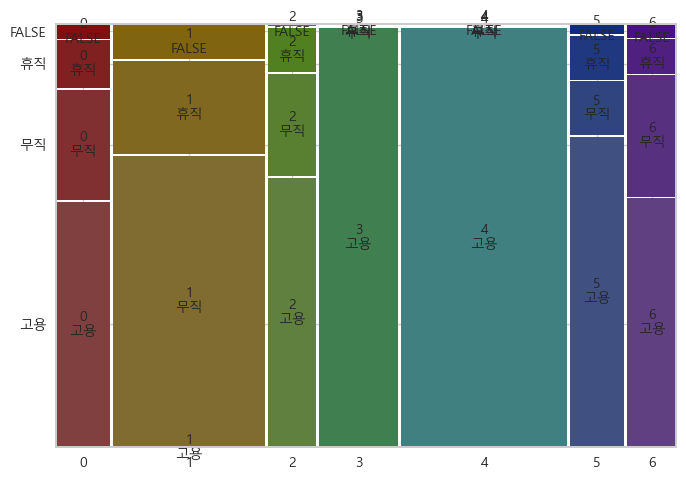

In [38]:
# [문제 21] '고용상태' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '고용상태'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'고용상태' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제 22]

### **8) 소득(수치)**

C:\Users\User\AppData\Local\Temp\ipykernel_6356\3562716418.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))


소득                                    
               max       min         mean       median
cluster                                               
0        128243500         0  48108641.22  45389300.00
1         96421000  24045000  53765547.90  52493000.00
2         39601100         0   7754089.80         0.00
3        132020900  82386000 101903323.03 100976700.00
4        131727200         0  45125778.41  38944400.00
5        131674400         0  55498152.41  52768500.00
6        130366500         0  40504390.36  35901000.00

C:\Users\User\AppData\Local\Temp\ipykernel_6356\3562716418.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature, data=result, palette='cool')


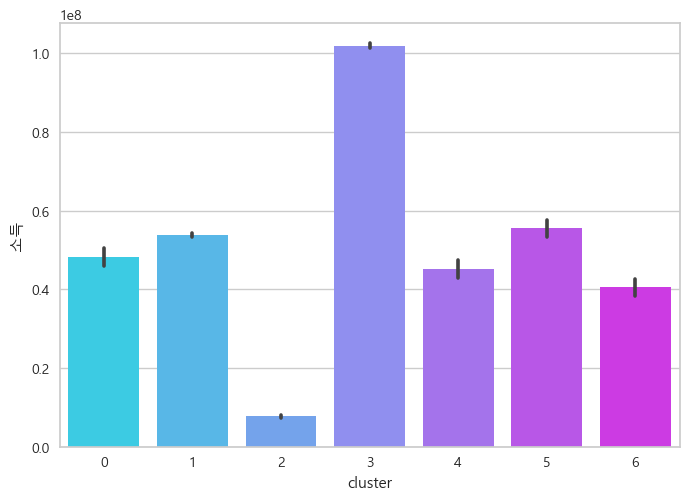

In [ ]:
# [문제 23] '소득'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = '소득'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))

sns.barplot(x='cluster', y=feature, data=result, palette='cool')
plt.show()


<b>**'소득' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제24]

### **9) 결혼여부**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
결혼여부,,,,,,,,,,,,,,,,
기혼,570,2232,1187,1073,676,702,517,6957,0.60,0.68,0.39,0.68,0.63,0.65,0.53,0.58
미혼,381,1075,1832,516,403,378,458,5043,0.40,0.33,0.61,0.33,0.37,0.35,0.47,0.42
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


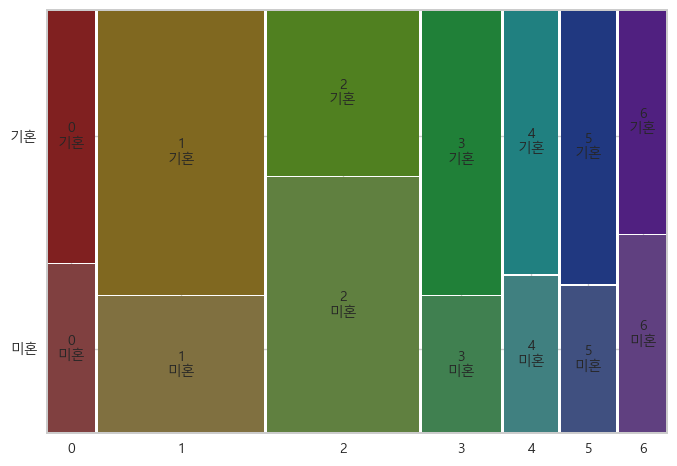

In [ ]:
# [문제 25] '결혼여부' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '결혼여부'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'결혼여부' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제26]

### **10) 월 납입액(수치)**

C:\Users\User\AppData\Local\Temp\ipykernel_10020\3910937630.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))


월 납입액                   
          max  min   mean median
cluster                         
0         160   60  88.28  80.00
1         160   60  88.68  80.00
2         230  110 135.30 120.00
3         160   60  87.59  80.00
4         160   60  87.69  80.00
5         160   60  88.50  80.00
6         350  100 188.89 190.00

C:\Users\User\AppData\Local\Temp\ipykernel_10020\3910937630.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature, data=result, palette='cool')


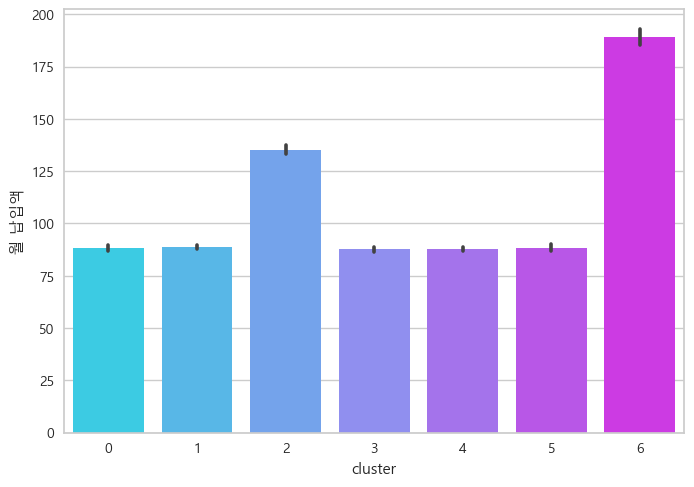

In [39]:
# [문제 27] '월 납입액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = '월 납입액'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))

sns.barplot(x='cluster', y=feature, data=result, palette='cool')
plt.show()


<b>**'월 납입액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제28]

### **11) VOC**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
VOC,,,,,,,,,,,,,,,,
0,847,2399,764,1266,2612,850,777,9515,0.79,0.80,0.80,0.80,0.79,0.79,0.80,0.79
1,107,329,99,156,380,131,111,1313,0.10,0.11,0.10,0.10,0.12,0.12,0.11,0.11
2,51,124,49,65,124,34,48,495,0.05,0.04,0.05,0.04,0.04,0.03,0.05,0.04
3,41,101,24,69,105,35,30,405,0.04,0.03,0.03,0.04,0.03,0.03,0.03,0.03
4,27,44,9,19,62,27,8,196,0.03,0.01,0.01,0.01,0.02,0.03,0.01,0.02
5,6,22,6,14,22,3,3,76,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


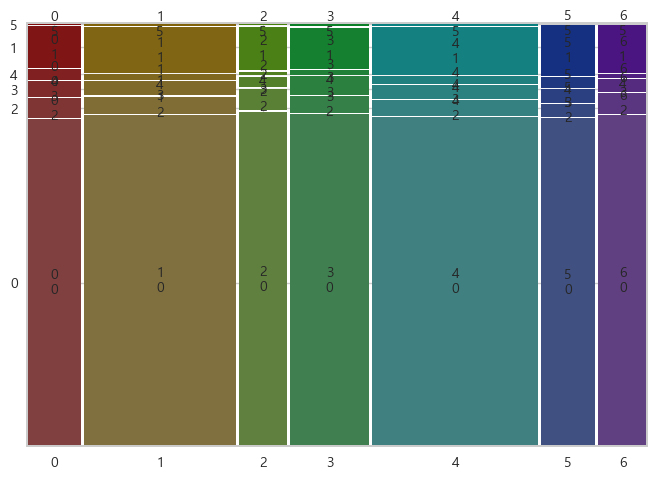

In [40]:
# [문제 29] 'VOC' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = 'VOC'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'VOC' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제30]

### **12) 타 상품 보유 현황**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
타 상품 보유 현황,,,,,,,,,,,,,,,,
1,439,1026,329,568,1163,403,355,4283,0.41,0.34,0.35,0.36,0.35,0.37,0.36,0.36
2,251,783,267,359,850,262,245,3017,0.23,0.26,0.28,0.23,0.26,0.24,0.25,0.25
3,132,391,120,229,421,147,105,1545,0.12,0.13,0.13,0.14,0.13,0.14,0.11,0.13
4이상,257,819,235,433,871,268,272,3155,0.24,0.27,0.25,0.27,0.26,0.25,0.28,0.26
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


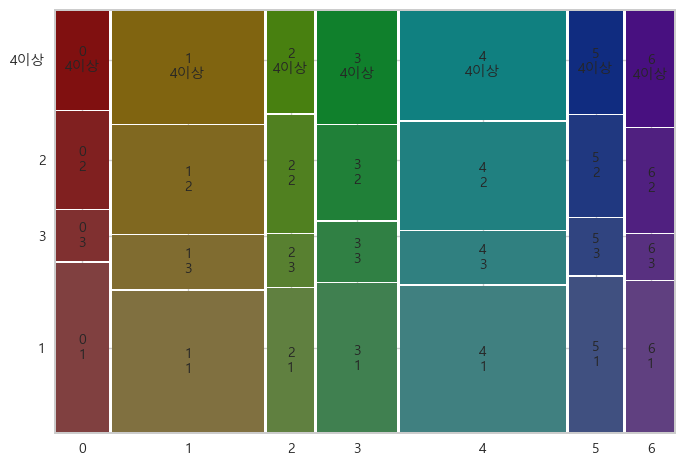

In [41]:
# [문제 31] '타 상품 보유 현황' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
feature = '타 상품 보유 현황'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'타 상품 보유 현황	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제32]

### **13) 갱신 인센티브**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
갱신인센티브,,,,,,,,,,,,,,,,
설계사독려,382,718,255,701,1140,381,288,3865,0.35,0.24,0.27,0.44,0.34,0.35,0.29,0.32
없음,118,240,64,228,441,149,98,1338,0.11,0.08,0.07,0.14,0.13,0.14,0.10,0.11
포인트,159,433,145,233,572,197,152,1891,0.15,0.14,0.15,0.15,0.17,0.18,0.16,0.16
할인,420,1628,487,427,1152,353,439,4906,0.39,0.54,0.51,0.27,0.35,0.33,0.45,0.41
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


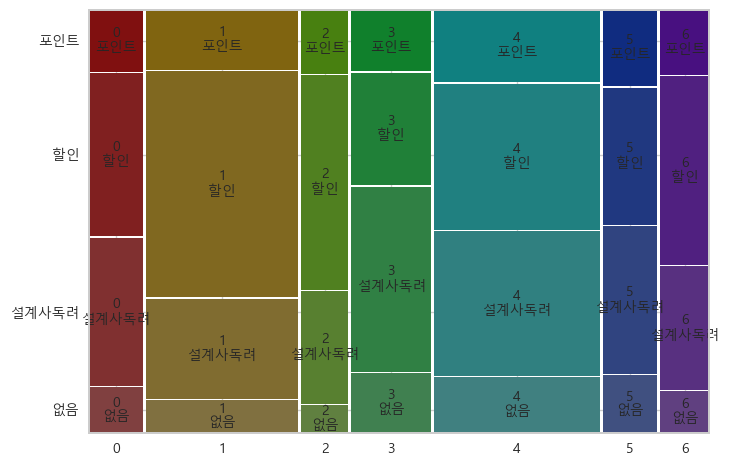

In [42]:
# [문제 33] '갱신인센티브' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '갱신인센티브'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'갱신인센티브	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제 34]

### **14) 총 지불 금액(수치)**

C:\Users\User\AppData\Local\Temp\ipykernel_10020\2716982440.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))


총지불금액                           
             max   min       mean    median
cluster                                    
0        1700000  1000  448273.40 427000.00
1        1919000  3000  622037.43 578000.00
2        2663000  1000  717643.53 674000.00
3        1040000     0  343249.84 351000.00
4        1512000  1000  422119.82 409000.00
5        1340000  2000  380673.15 385000.00
6        3573000  2000 1055548.62 957000.00

C:\Users\User\AppData\Local\Temp\ipykernel_10020\2716982440.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature, data=result, palette='cool')


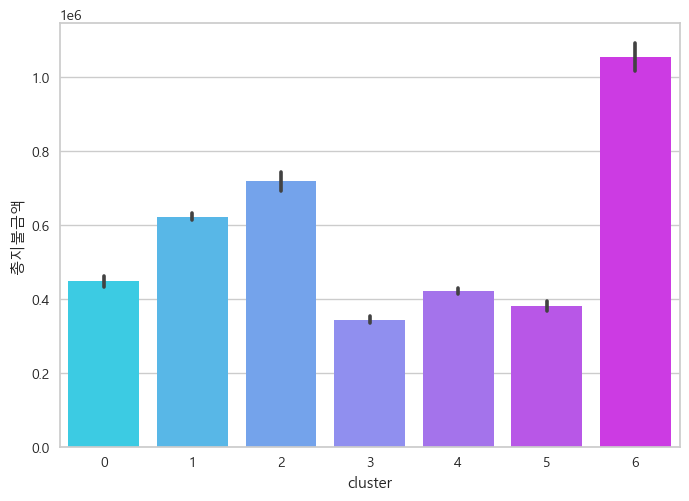

In [43]:
# [문제 35] '총지불금액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature = '총지불금액'
display(result[['cluster',feature]].groupby(['cluster']).agg(['max','min','mean','median']))

sns.barplot(x='cluster', y=feature, data=result, palette='cool')
plt.show()



<b>**'총지불금액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제 36]

### **15) 자동차**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
자동차,,,,,,,,,,,,,,,,
SUV,209,698,194,315,716,200,4,2336,0.19,0.23,0.20,0.20,0.22,0.18,0.00,0.20
고급차,0,0,0,0,0,0,454,454,0.00,0.00,0.00,0.00,0.00,0.00,0.47,0.04
스포츠카,34,5,6,46,3,39,519,652,0.03,0.00,0.01,0.03,0.00,0.04,0.53,0.05
일반세단,564,1653,556,833,1879,589,0,6074,0.52,0.55,0.58,0.52,0.57,0.55,0.00,0.51
컴팩트카,272,663,195,395,707,252,0,2484,0.25,0.22,0.20,0.25,0.21,0.23,0.00,0.21
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


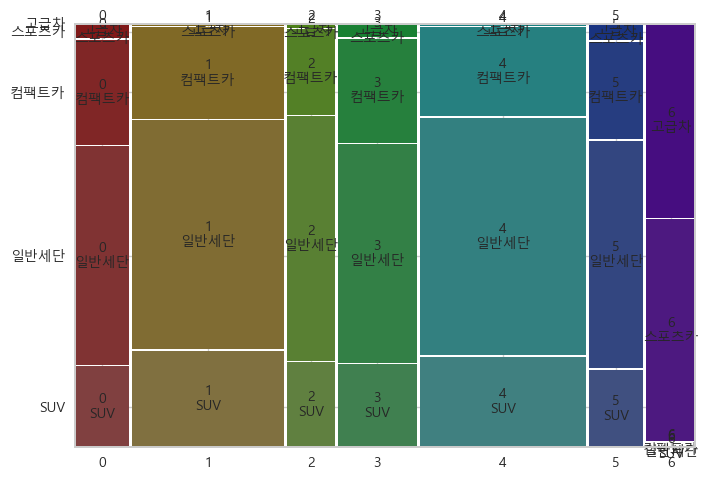

In [44]:
# [문제 37] '자동차' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '자동차'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'자동차' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제38]

 ### **16) 거주지 사이즈**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
거주지사이즈,,,,,,,,,,,,,,,,
대,1079,0,85,0,0,0,81,1245,1.00,0.00,0.09,0.00,0.00,0.00,0.08,0.10
소,0,675,185,343,699,249,181,2332,0.00,0.22,0.20,0.22,0.21,0.23,0.18,0.19
중,0,2344,681,1246,2606,831,715,8423,0.00,0.78,0.72,0.78,0.79,0.77,0.73,0.70
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


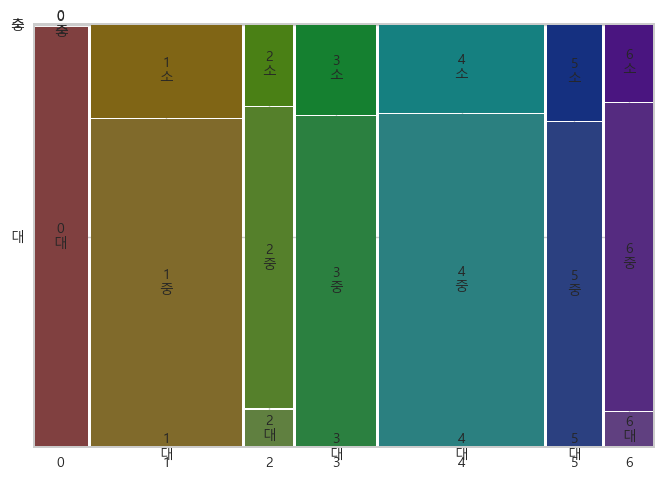

In [45]:
# [문제 39] '거주지사이즈' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '거주지사이즈'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'거주지사이즈' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제40]

### **17) 갱신**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
갱신,,,,,,,,,,,,,,,,
0,868,2540,825,1386,2906,922,837,10284,0.80,0.84,0.87,0.87,0.88,0.85,0.86,0.86
1,211,479,126,203,399,158,140,1716,0.20,0.16,0.13,0.13,0.12,0.15,0.14,0.14
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


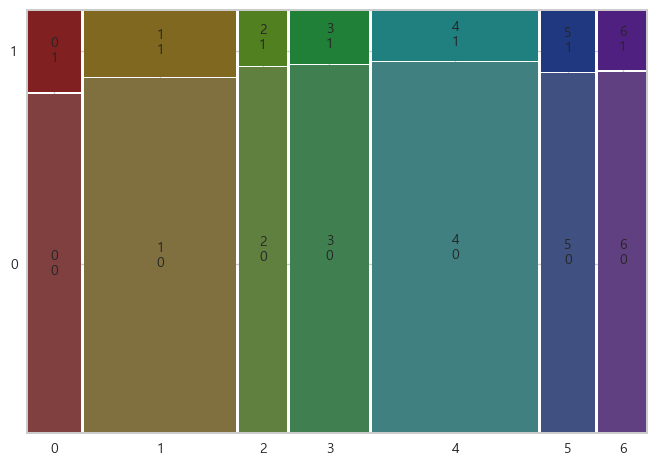

In [46]:
# [문제 41] '갱신' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '갱신'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'갱신' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제42]

### **18) 지역**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
지역,,,,,,,,,,,,,,,,
도시근교,648,2754,658,539,1772,469,732,7572,0.60,0.91,0.69,0.34,0.54,0.43,0.75,0.63
도심,175,130,111,505,770,268,125,2084,0.16,0.04,0.12,0.32,0.23,0.25,0.13,0.17
시골,256,135,182,545,763,343,120,2344,0.24,0.04,0.19,0.34,0.23,0.32,0.12,0.20
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


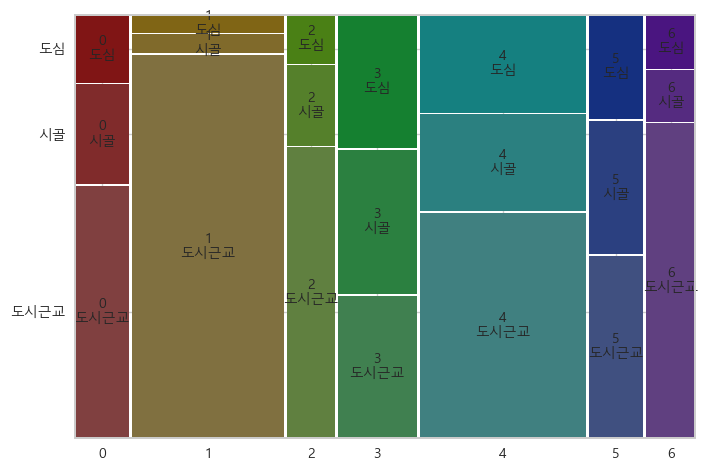

In [47]:
# [문제 43] '지역' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '지역'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'지역' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제44]

### **19) 온라인방문빈도**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
온라인방문빈도,,,,,,,,,,,,,,,,
비방문,809,2266,713,1149,2436,832,723,8928,0.75,0.75,0.75,0.72,0.74,0.77,0.74,0.74
자주방문,227,631,204,364,735,205,209,2575,0.21,0.21,0.21,0.23,0.22,0.19,0.21,0.21
종종,43,122,34,76,134,43,45,497,0.04,0.04,0.04,0.05,0.04,0.04,0.05,0.04
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


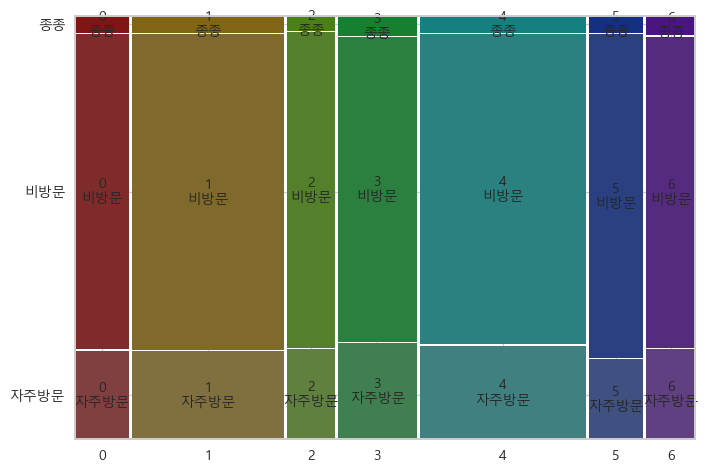

In [48]:
# [문제 45] '온라인방문빈도' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '온라인방문빈도'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'온라인방문빈도' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제46]

### **20) 판매채널**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
판매채널,,,,,,,,,,,,,,,,
대리점,385,1216,341,593,1270,400,387,4592,0.36,0.40,0.36,0.37,0.38,0.37,0.40,0.38
인터넷,141,438,149,238,466,145,163,1740,0.13,0.14,0.16,0.15,0.14,0.13,0.17,0.14
자사영업,334,803,271,420,938,321,262,3349,0.31,0.27,0.28,0.26,0.28,0.30,0.27,0.28
콜센터,219,562,190,338,631,214,165,2319,0.20,0.19,0.20,0.21,0.19,0.20,0.17,0.19
All,1079,3019,951,1589,3305,1080,977,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


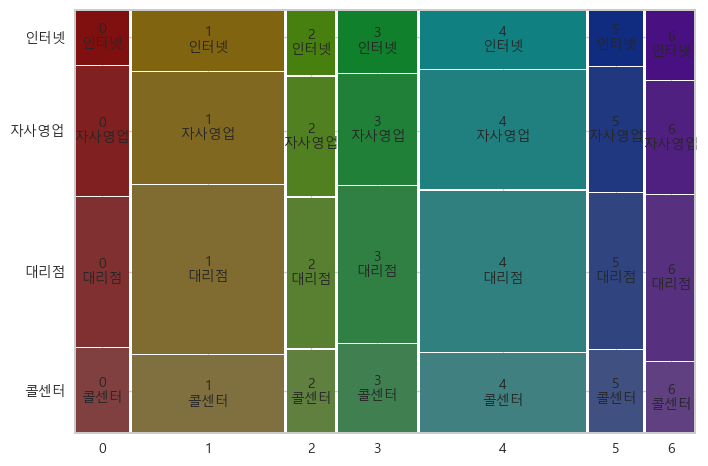

In [49]:
# [문제 47] '판매채널' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature = '판매채널'

pro_df1 = pd.crosstab([result[feature]], result['cluster'], margins=True)

pro_df2 = pd.crosstab([result[feature]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

pro_df = pd.concat([pro_df1, pro_df2], axis=1)

display(pro_df)

mosaic(result.sort_values('cluster'), [ 'cluster', feature])
plt.show()

<b>**'판매채널' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [50]:
result

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,...,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,cluster
0,3,피보험자,무직,1,2.62,0,기본,대학졸업,0,도시근교,...,80,0,1,자주방문,없음,자사영업,631000,일반세단,소,1
1,1,계약자,고용,0,6.35,0,기본,고졸이하,102887400,시골,...,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,3
2,2,계약자,휴직,0,4.97,0,기본,대학졸업,22159500,도시근교,...,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중,1
3,5,계약자,고용,1,13.48,0,고급,고졸이하,51562500,도시근교,...,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,2
4,4,계약자,고용,0,9.78,0,기본,석사,26820200,도시근교,...,120,0,3,비방문,없음,대리점,947000,SUV,중,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,계약자,고용,1,25.99,0,기본,대학졸업,86451000,도심,...,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중,3
11996,3,피보험자,고용,0,3.44,1,중급,대학졸업,25962000,도시근교,...,80,0,1,자주방문,할인,자사영업,468000,일반세단,중,4
11997,3,피보험자,무직,1,9.06,0,중급,대학졸업,0,도시근교,...,90,3,2,자주방문,할인,자사영업,977000,일반세단,중,1
11998,4,계약자,고용,1,8.35,0,중급,대학졸업,26366000,도시근교,...,100,0,3,비방문,포인트,자사영업,854000,일반세단,대,0


---------------------------------------------------------------------------------------------
## **(2) 결과 정리**

<font color="1E90FF"><b>★ 20가지 피쳐값에 대해 군집별로 분석해 보았고 인사이트도 도출해 보았다. 한번 ppt에 정리해보자!</font>

## **[Mission 3-분석모델 개발]**

* k-means 활용해 군집화 분석 모델 개발 완료
* 프로파일링 기법을 통해 각 피쳐의 군집별 특성에 대해 파악하고 정의 해봄
* 정의 한 것을 가지고 고객 군집별 마케팅 전략 수립

<font color="1E90FF"><b>→ 여러분들은 어떻게 군집에 대해 정의를 내리고 마케팅 방안을 수립하였나요?<br><b>서로의 군집에 대해서 이야기해 보고 발표해 봅시다.<b><br>
    

# <b>Mission 3 완료!
수고하셨습니다!

In [ ]:
col_list = list(result.columns)

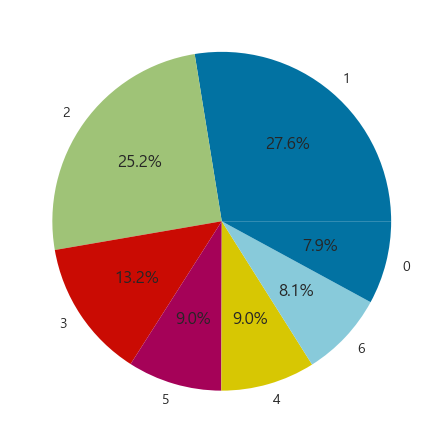

In [ ]:
cluster_counts = dict(result['cluster'].value_counts(normalize=True))

plt.pie(cluster_counts.values(), labels = cluster_counts.keys(), autopct = '%1.1f%%')
plt.show()

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AGE                      12000 non-null  int64   
 1   등록(계/피)                  12000 non-null  object  
 2   고용상태                     12000 non-null  object  
 3   성별                       12000 non-null  int64   
 4   Willingness to pay/Stay  12000 non-null  float64 
 5   갱신                       12000 non-null  int64   
 6   상품타입                     12000 non-null  object  
 7   교육수준                     12000 non-null  object  
 8   소득                       12000 non-null  int64   
 9   지역                       12000 non-null  object  
 10  결혼여부                     12000 non-null  object  
 11  월 납입액                    12000 non-null  int64   
 12  VOC                      12000 non-null  int64   
 13  타 상품 보유 현황               12000 non-null  object  
 14  온라인방문빈

In [ ]:
categorical_cols = result.select_dtypes(include='int64').columns.tolist()
cluster_ids = sorted(result['cluster'].unique())

for col in categorical_cols:
    if col not in ['소득', '총지불금액', '월 납입액']  :
        print('\n', col)
        for cluster_id in cluster_ids:
            counts = result[result['cluster'] == cluster_id][col].value_counts(normalize = True).to_dict()
            print(f"  Cluster {cluster_id}: {counts}")


 AGE
  Cluster 0: {3: 0.35436382754994744, 4: 0.231335436382755, 5: 0.19663512092534174, 2: 0.11356466876971609, 1: 0.09253417455310199, 6: 0.011566771819137749}
  Cluster 1: {4: 0.5349259147263381, 3: 0.29634109464771696, 5: 0.1654067130329604, 6: 0.003326277592984578}
  Cluster 2: {3: 0.7363365352765816, 2: 0.15899304405432263, 4: 0.10467042066909572}
  Cluster 3: {1: 0.6400251730648207, 2: 0.35997482693517935}
  Cluster 4: {3: 0.448563484708063, 4: 0.23169601482854496, 1: 0.1380908248378128, 2: 0.13160333642261354, 5: 0.05004633920296571}
  Cluster 5: {3: 0.3398148148148148, 4: 0.2851851851851852, 1: 0.1638888888888889, 2: 0.15092592592592594, 5: 0.05925925925925926, 6: 0.000925925925925926}
  Cluster 6: {3: 0.39384615384615385, 4: 0.2676923076923077, 5: 0.21025641025641026, 2: 0.07487179487179488, 6: 0.029743589743589743, 1: 0.02358974358974359}

 성별
  Cluster 0: {0: 0.5110410094637224, 1: 0.4889589905362776}
  Cluster 1: {0: 0.5176897490172362, 1: 0.4823102509827638}
  Cluster 2:

In [ ]:
categorical_cols = result.select_dtypes(include='object').columns.tolist()
cluster_ids = sorted(result['cluster'].unique())

for col in categorical_cols:
    print('\n', col)
    for cluster_id in cluster_ids:
        counts = result[result['cluster'] == cluster_id][col].value_counts(normalize = True).to_dict()
        print(f"  Cluster {cluster_id}: {counts}")


 등록(계/피)
  Cluster 0: {'계약자': 0.7854889589905363, '피보험자': 0.21451104100946372}
  Cluster 1: {'계약자': 0.7777441790142122, '피보험자': 0.22225582098578772}
  Cluster 2: {'계약자': 0.7909903941702551, '피보험자': 0.20900960582974495}
  Cluster 3: {'계약자': 0.7709251101321586, '피보험자': 0.2290748898678414}
  Cluster 4: {'계약자': 0.7896200185356812, '피보험자': 0.21037998146431883}
  Cluster 5: {'계약자': 0.8101851851851852, '피보험자': 0.18981481481481483}
  Cluster 6: {'계약자': 0.7856410256410257, '피보험자': 0.21435897435897436}

 고용상태
  Cluster 0: {'고용': 0.6424815983175605, '무직': 0.24500525762355416, '휴직': 0.10620399579390116, 'FALSE': 0.006309148264984227}
  Cluster 1: {'고용': 1.0}
  Cluster 2: {'무직': 0.69195097714475, '휴직': 0.22358396820139118, 'FALSE': 0.0844650546538589}
  Cluster 3: {'고용': 1.0}
  Cluster 4: {'고용': 0.5857275254865616, '무직': 0.26413345690454126, '휴직': 0.11399443929564411, 'FALSE': 0.03614457831325301}
  Cluster 5: {'고용': 0.7407407407407407, '무직': 0.1287037037037037, '휴직': 0.10555555555555556, 'FALSE':

In [ ]:
col_list.remove('cluster')

In [ ]:
len(col_list)

20

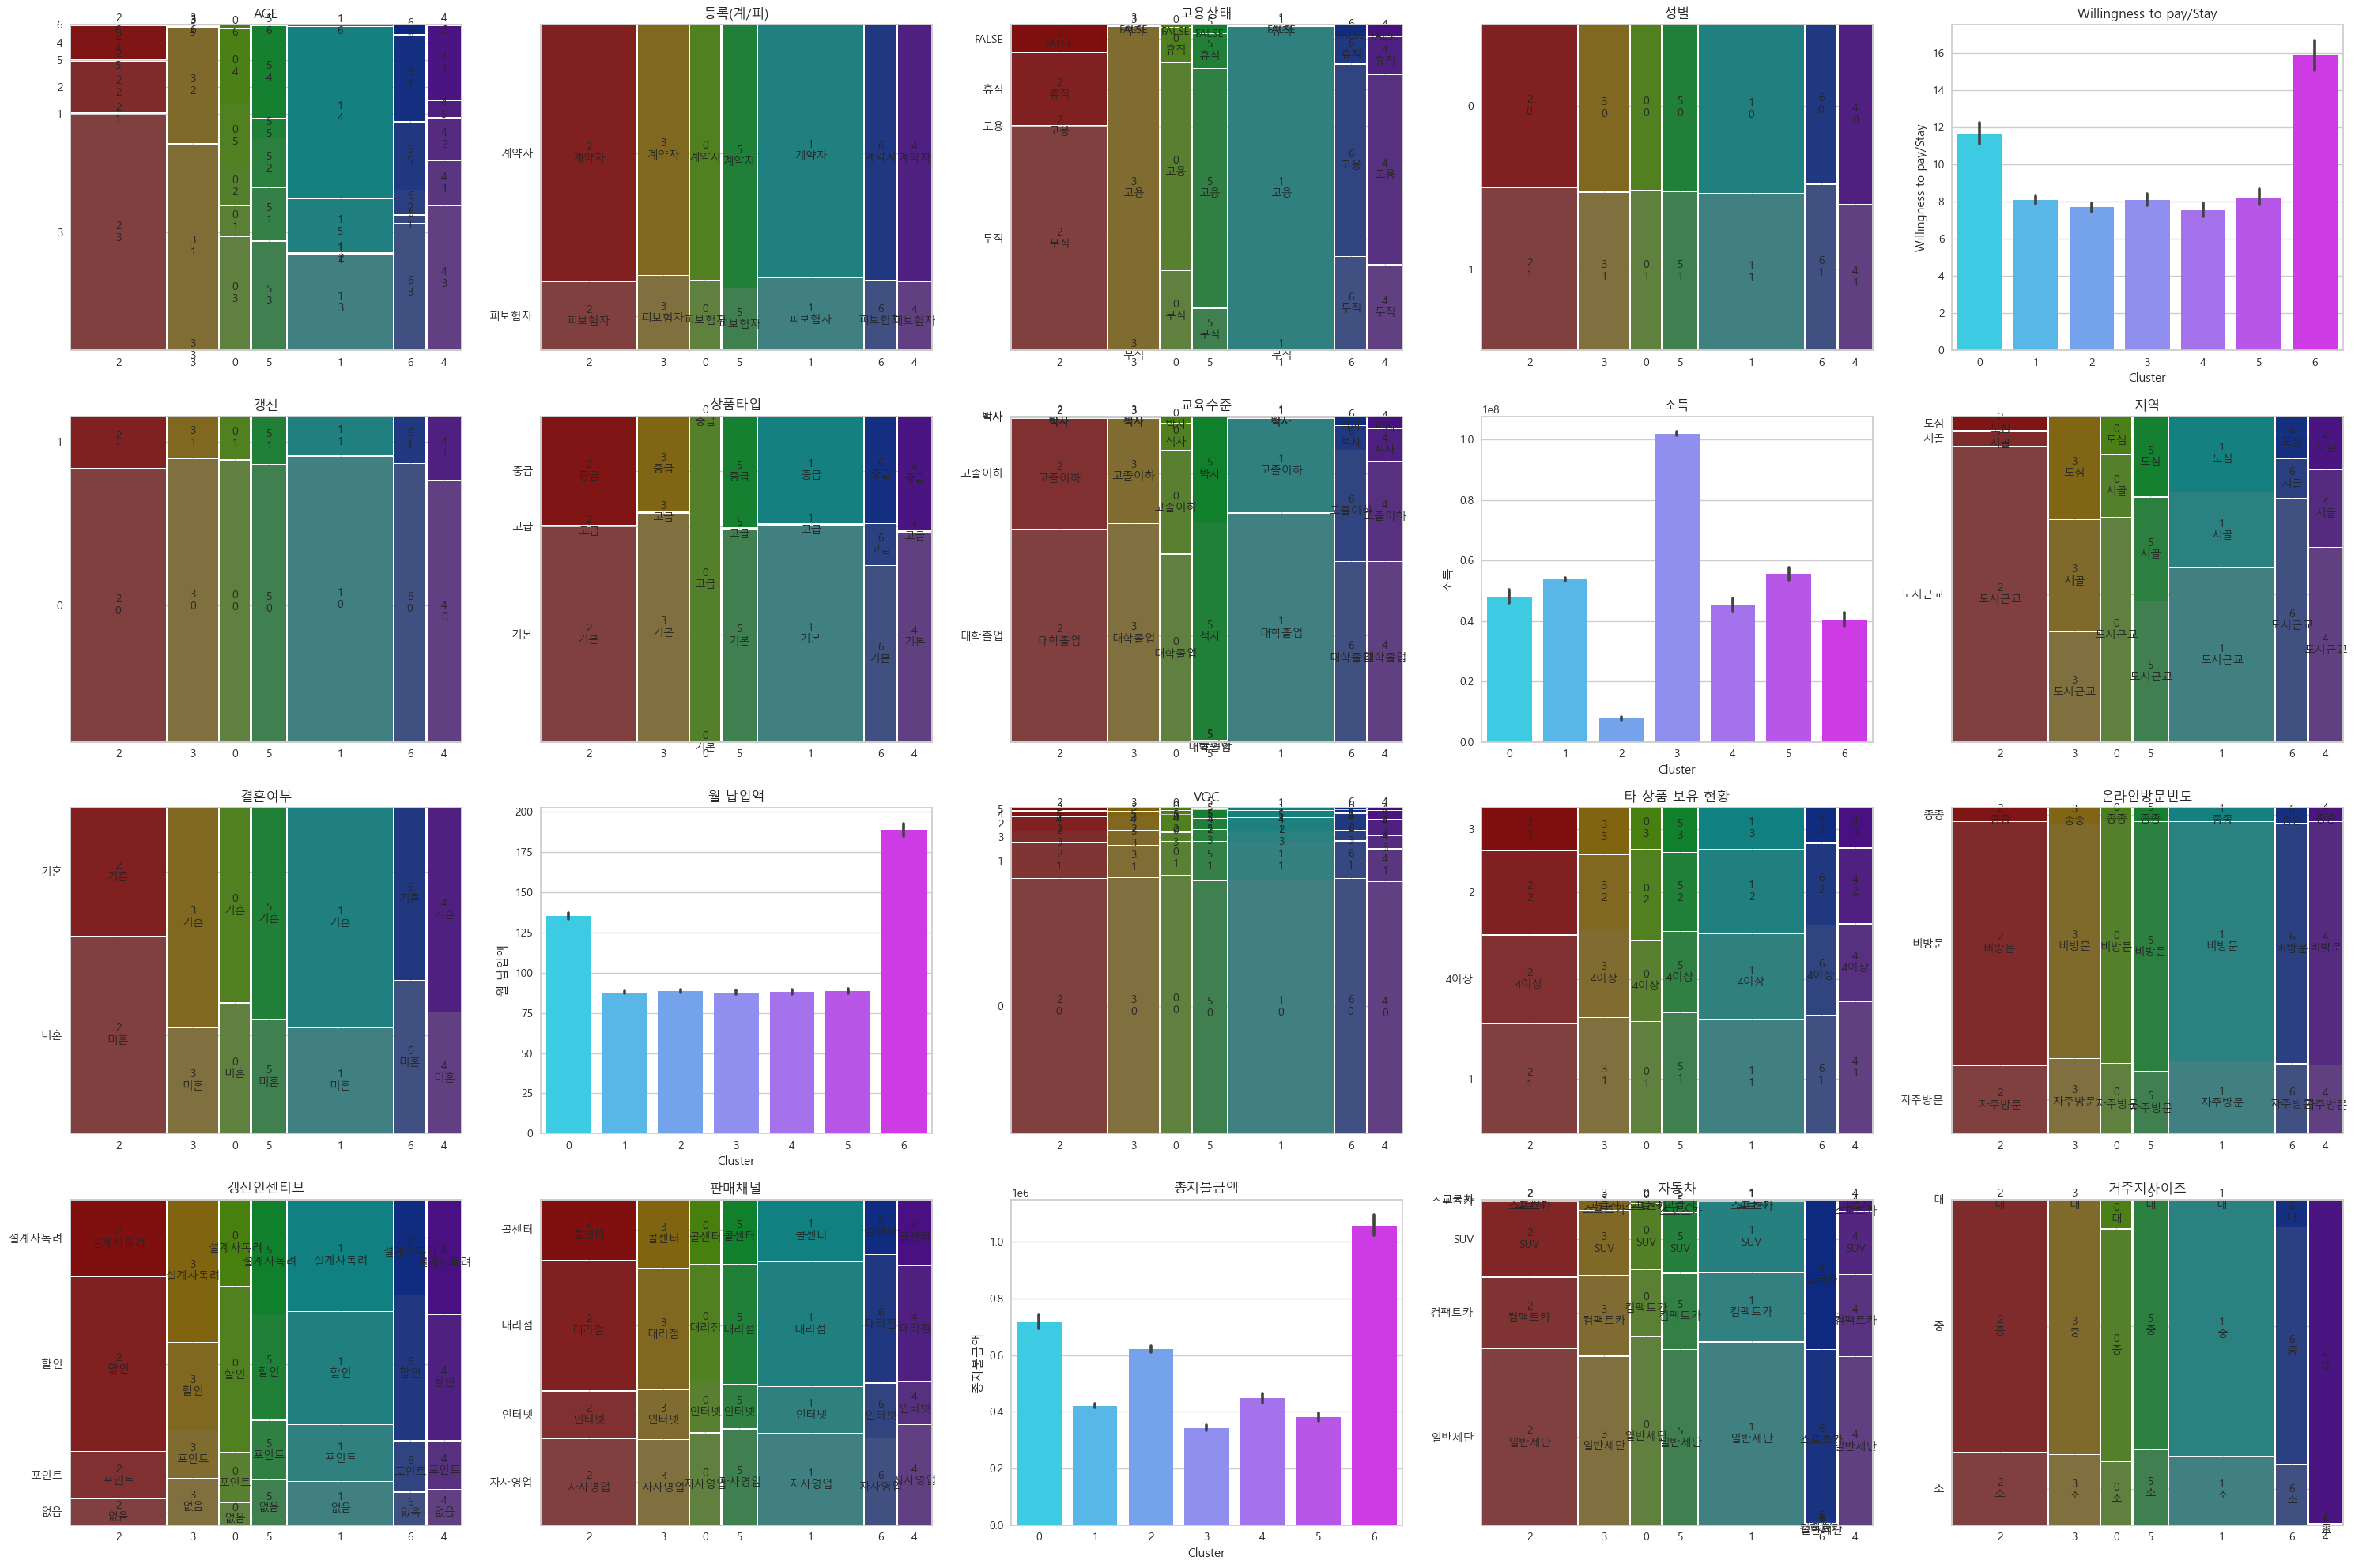

In [ ]:
continuous = ['Willingness to pay/Stay', '월 납입액', '소득', '총지불금액']

fig, axes = plt.subplots(4, 5, figsize=(30, 20))
axes = axes.flatten()

for i, feature in enumerate(col_list):
    ax = axes[i]

    if feature in continuous:
        sns.barplot(x='cluster', y=feature, hue='cluster', data=result, palette='cool', ax=ax, legend=False)
        ax.set_title(f'{feature}')
        ax.set_xlabel('Cluster')
        ax.set_ylabel(feature)

    else:
        pro_df1 = pd.crosstab(result[feature], result['cluster'], margins=True)
        pro_df2 = pd.crosstab(result[feature], result['cluster'], margins=True, normalize='columns').round(3)
        pro_df = pd.concat([pro_df1, pro_df2], axis=1)
        mosaic(result, ['cluster', feature], ax=ax)

        ax.set_title(f'{feature}')

plt.tight_layout()
plt.savefig('total_feature_print.pdf')
plt.show()


In [ ]:
age_map = {
    1: '20대',
    2: '30대',
    3: '40대',
    4: '50대',
    5: '60대',
    6: '670대'
}
result['AGE'] = result['AGE'].map(age_map)
renewal_map = {
    1: '갱신',
    0: '미갱신'
}
result['갱신'] = result['갱신'].map(renewal_map)
result['VOC'] = result['VOC'].astype('object')

In [ ]:
result['AGE']

0        40대
1        20대
2        30대
3        60대
4        50대
        ... 
11995    20대
11996    40대
11997    40대
11998    50대
11999    40대
Name: AGE, Length: 12000, dtype: object

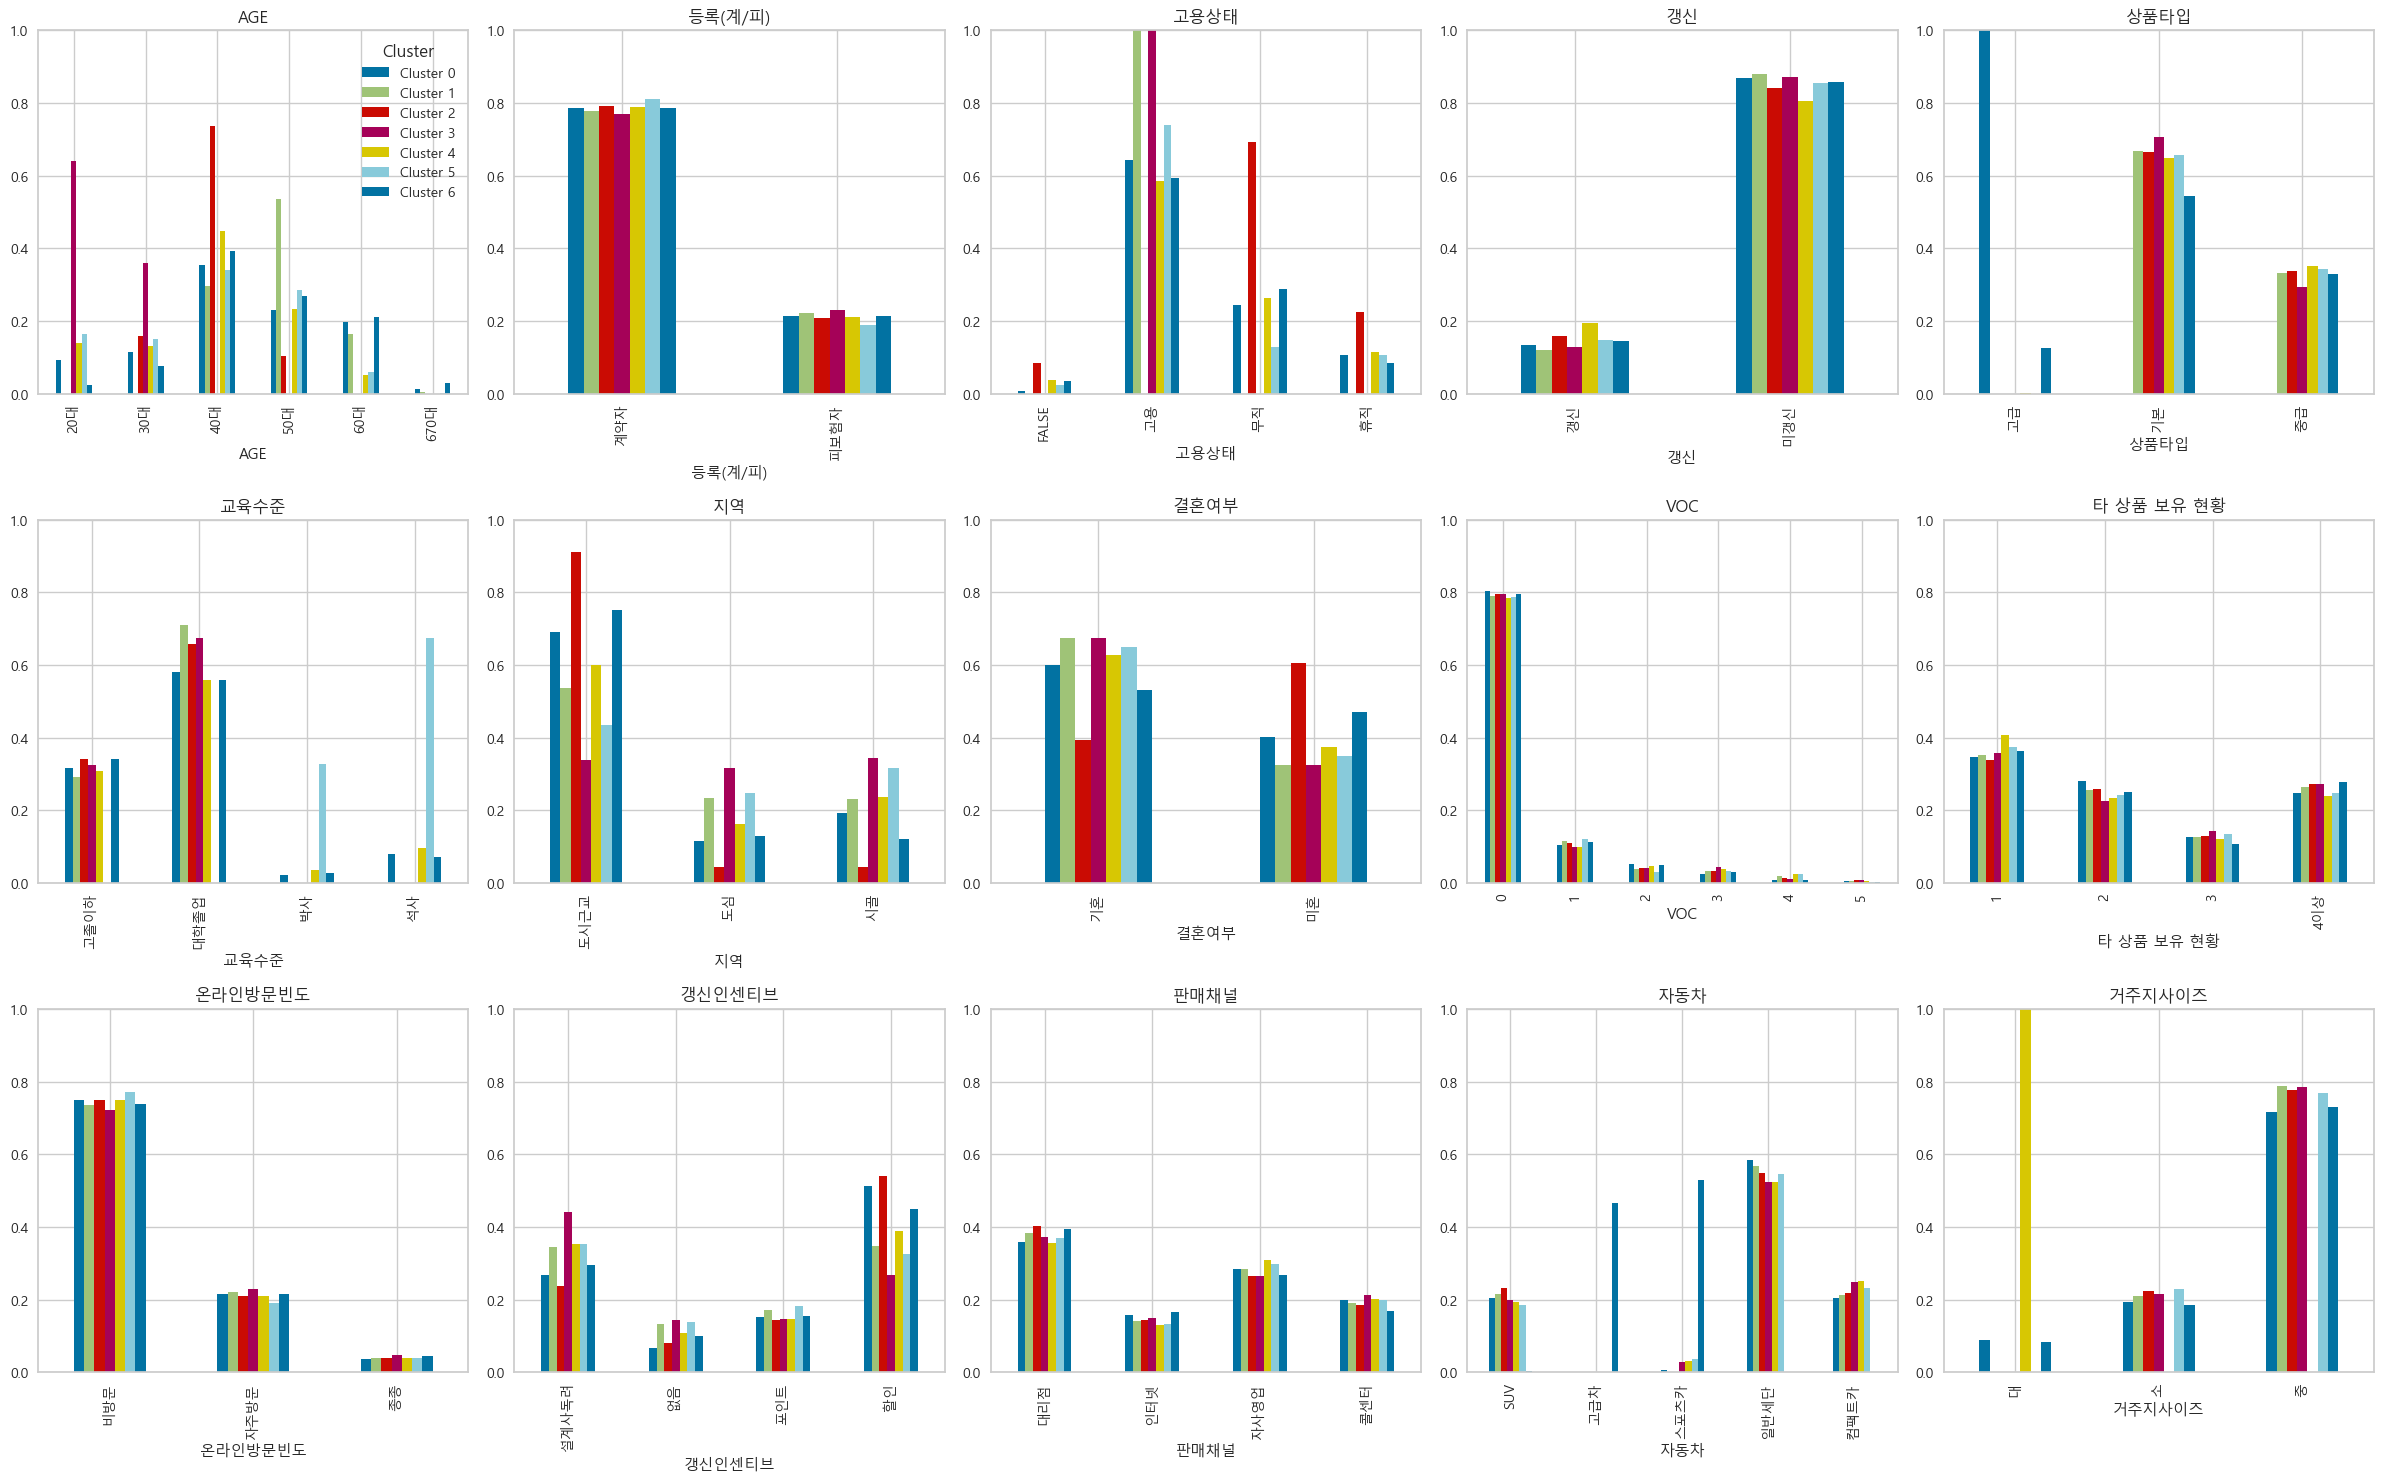

In [ ]:
categorical_cols = result.select_dtypes(include='object').columns.tolist()
target_clusters = [0, 1, 2, 3, 4, 5, 6]

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(24, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    data = []
    for cluster_id in target_clusters:
        counts = result[result['cluster'] == cluster_id][col].value_counts(normalize=True)
        for category, ratio in counts.items():
            data.append({'cluster': f'Cluster {cluster_id}', col: category, 'ratio': ratio})

    df_plot = pd.DataFrame(data)

    pivot = df_plot.pivot(index=col, columns='cluster', values='ratio').fillna(0)
    pivot.plot(kind='bar', ax=ax)

    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylim(0, 1)
    if i == 0:
        ax.legend(title='Cluster')
    else:
        ax.legend().remove()

plt.tight_layout()
plt.savefig('0~6_categroy.pdf')
plt.show()


- 충성그룹 -> 로열티
- - 0, 6 : 로얄티 높음 매우
    - 상품 타입 : 고급 0 vs 기본, 중급 6
    - 자동차 : suv, 일반세단, 컴팩트 카 0 vs 고급차, 스포츠카 6
- 잠재 -> 리워드로 충성 만들기
- 이탈 -> 이탈 못하게 막기




In [ ]:
from scipy.stats import ttest_ind

continuous_cols = result.select_dtypes(include='number').columns.tolist()

ttest_results = []

for col in continuous_cols:
    group0 = result[result['cluster'] == 0][col].dropna()
    group6 = result[result['cluster'] == 6][col].dropna()

    if len(group0) > 1 and len(group6) > 1:
        t_stat, p_value = ttest_ind(group0, group6, equal_var=False)
        ttest_results.append({
            '변수': col,
            't-statistic': round(t_stat, 4),
            'p-value': round(p_value, 4)
        })

import pandas as pd
ttest_df = pd.DataFrame(ttest_results)
display(ttest_df.sort_values('p-value'))


,변수,t-statistic,p-value
1,Willingness to pay/Stay,-8.35,0.00
2,소득,4.63,0.00
3,월 납입액,-23.81,0.00
4,총지불금액,-15.09,0.00
0,성별,-0.96,0.34


In [ ]:
from scipy.stats import chi2_contingency

categorical_cols = result.select_dtypes(include='object').columns.tolist()

chi2_results = []

for col in categorical_cols:
    contingency = pd.crosstab(result['cluster'], result[col])

    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        chi2_results.append({
            '변수': col,
            'chi2-statistic': round(chi2, 4),
            'p-value': round(p, 4),
            '자유도': dof
        })

chi2_df = pd.DataFrame(chi2_results)
display(chi2_df.sort_values('p-value'))

,변수,chi2-statistic,p-value,자유도
0,AGE,9944.13,0.00,30
2,고용상태,8132.79,0.00,18
3,갱신,47.80,0.00,6
4,상품타입,10691.95,0.00,12
6,지역,2023.73,0.00,12
5,교육수준,9189.86,0.00,18
7,결혼여부,656.67,0.00,6
11,갱신인센티브,534.21,0.00,18
14,거주지사이즈,10372.92,0.00,12
13,자동차,10587.82,0.00,24


In [ ]:
result['AGE'].unique()

array(['40대', '20대', '30대', '60대', '50대', '670대'], dtype=object)

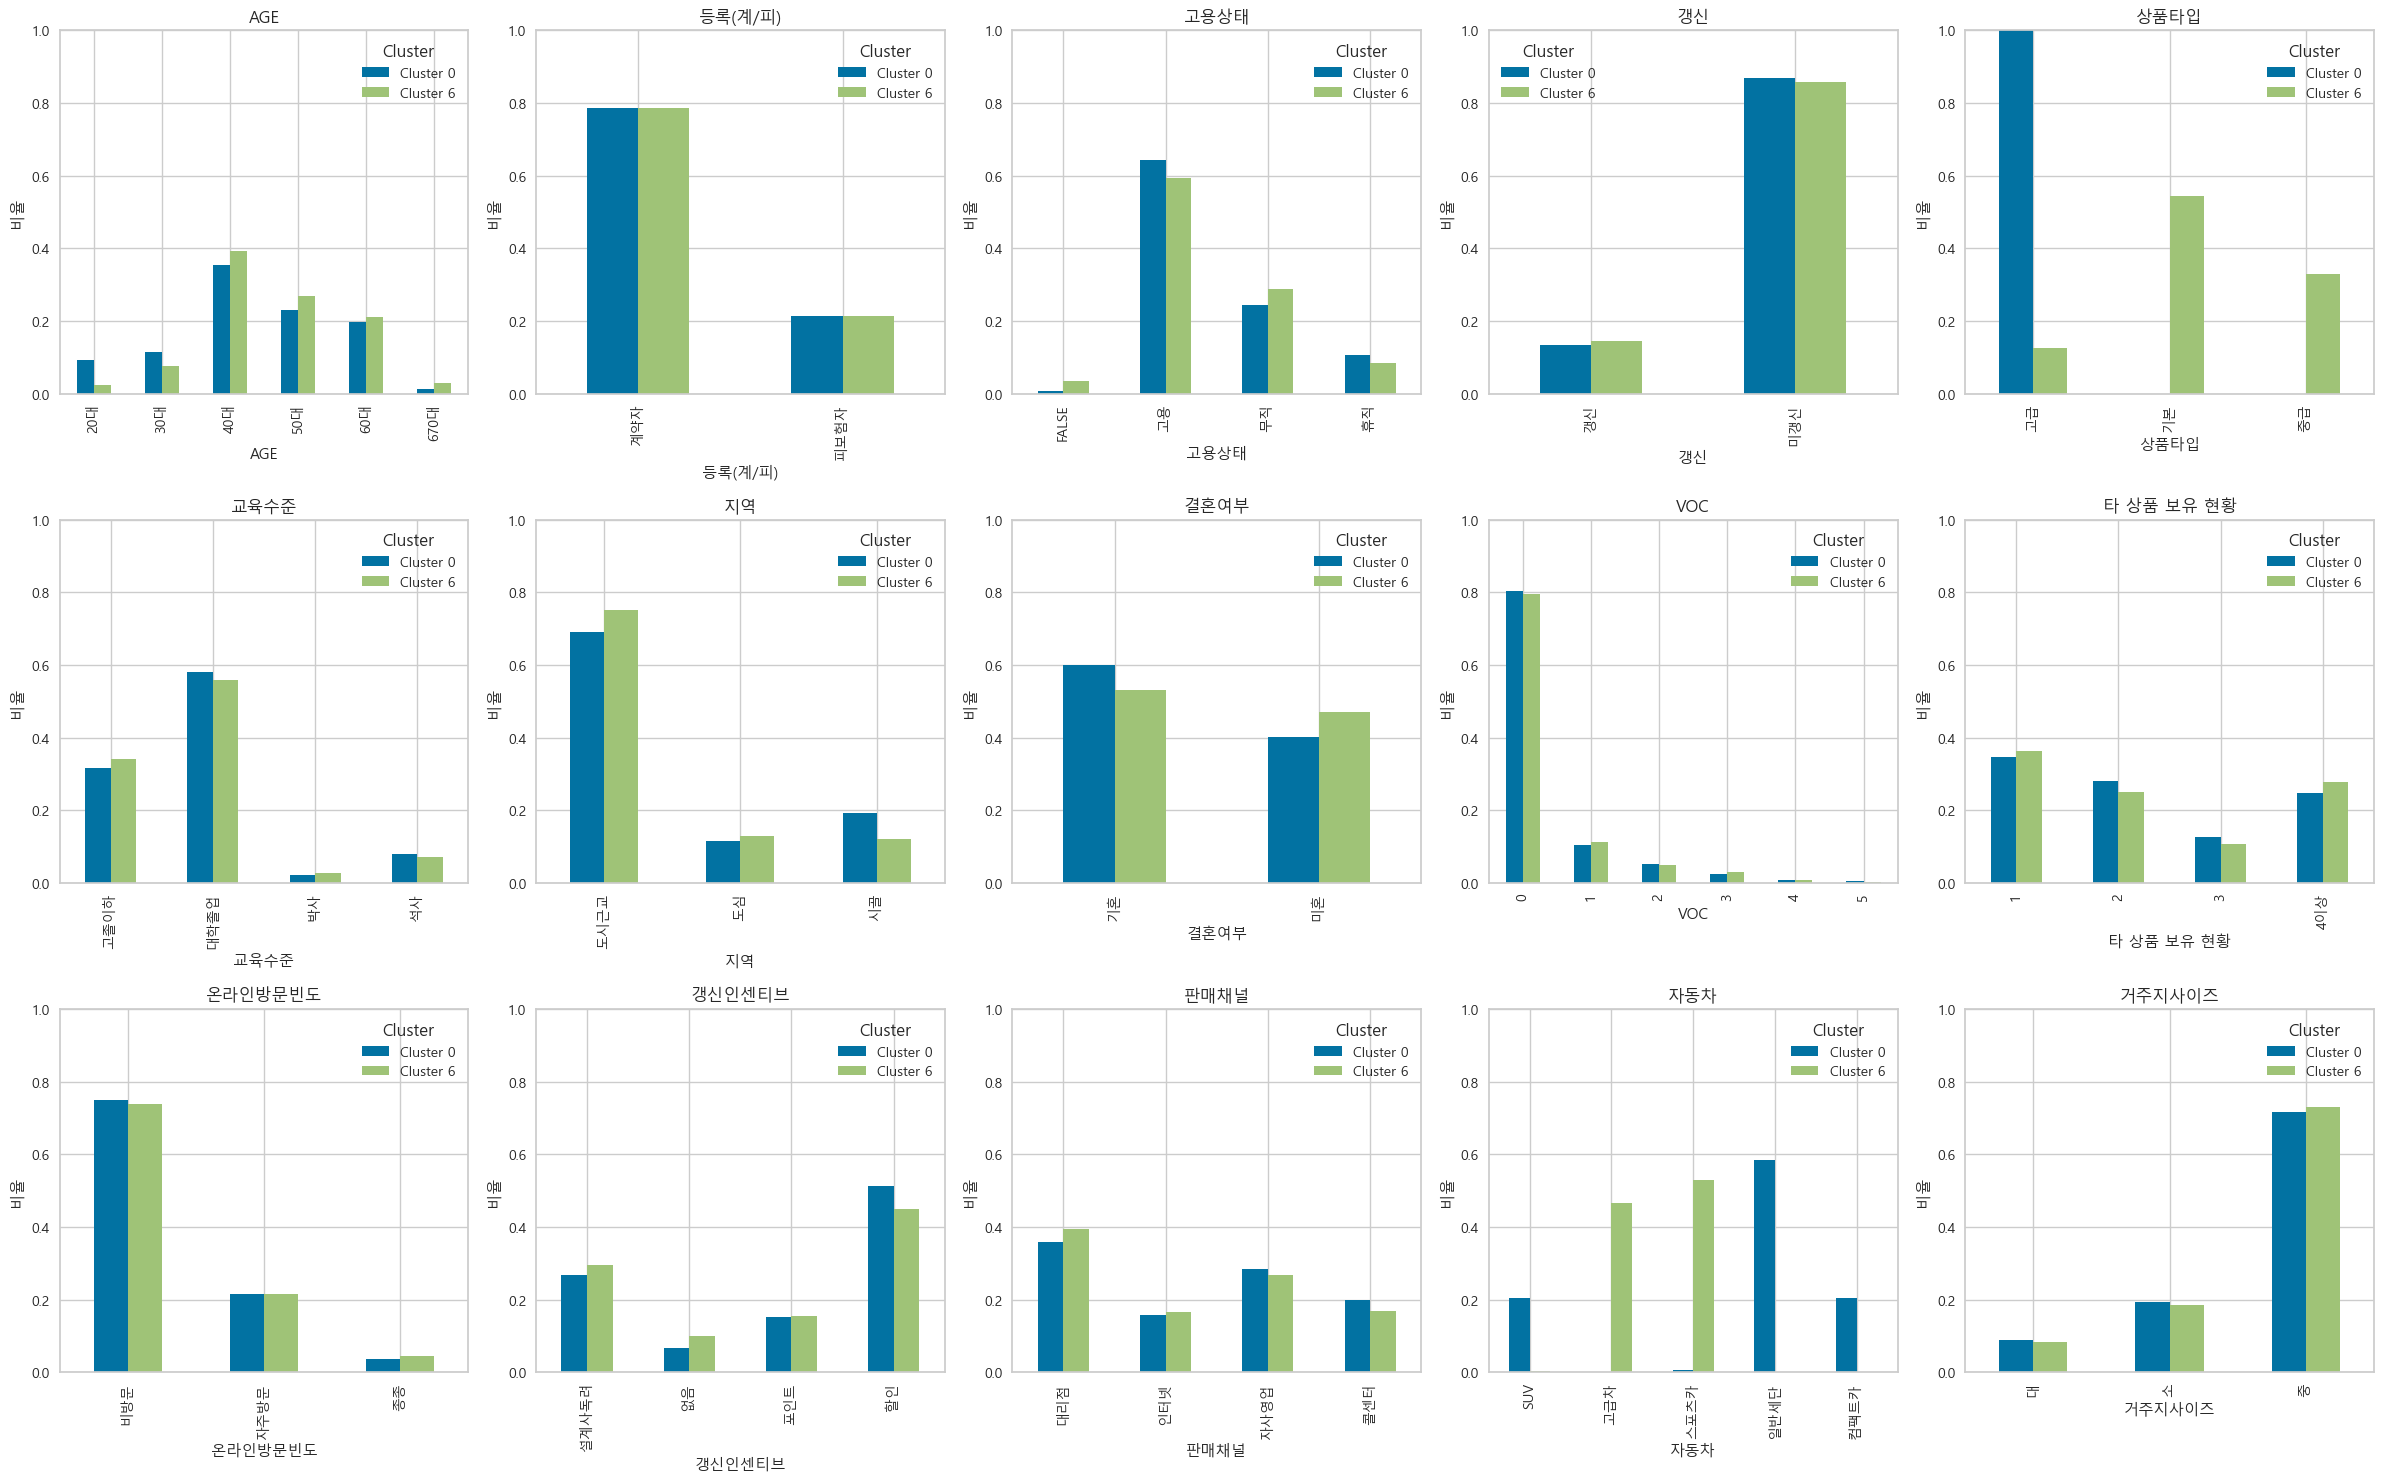

In [ ]:
categorical_cols = result.select_dtypes(include='object').columns.tolist()
target_clusters = [0, 6]

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(24, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    data = []
    for cluster_id in target_clusters:
        counts = result[result['cluster'] == cluster_id][col].value_counts(normalize=True)
        for category, ratio in counts.items():
            data.append({'cluster': f'Cluster {cluster_id}', col: category, 'ratio': ratio})

    df_plot = pd.DataFrame(data)

    pivot = df_plot.pivot(index=col, columns='cluster', values='ratio').fillna(0)
    pivot.plot(kind='bar', ax=ax)

    ax.set_title(f"{col}")
    ax.set_ylabel("비율")
    ax.set_xlabel(col)
    ax.set_ylim(0, 1)
    ax.legend(title='Cluster')

plt.tight_layout()
plt.savefig('0vs6_category.pdf')
plt.show()


12345 wtp 같아보임

In [ ]:
categorical_cols = result.select_dtypes(include='object').columns.tolist()

chi2_results = []

for col in categorical_cols:
    contingency = pd.crosstab(result['cluster'], result[col])

    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        chi2_results.append({
            '변수': col,
            'chi2-statistic': round(chi2, 4),
            'p-value': round(p, 4),
            '자유도': dof
        })

chi2_df = pd.DataFrame(chi2_results)
display(chi2_df.sort_values('p-value'))

,변수,chi2-statistic,p-value,자유도
0,AGE,9944.13,0.00,30
2,고용상태,8132.79,0.00,18
3,갱신,47.80,0.00,6
4,상품타입,10691.95,0.00,12
6,지역,2023.73,0.00,12
5,교육수준,9189.86,0.00,18
7,결혼여부,656.67,0.00,6
11,갱신인센티브,534.21,0.00,18
14,거주지사이즈,10372.92,0.00,12
13,자동차,10587.82,0.00,24


In [ ]:
continuous_cols = result.select_dtypes(include='number').columns.tolist()

ttest_results = []

for col in continuous_cols:
    group0 = result[result['cluster'] == 0][col].dropna()
    group6 = result[result['cluster'] == 6][col].dropna()

    if len(group0) > 1 and len(group6) > 1:
        t_stat, p_value = ttest_ind(group0, group6, equal_var=False)
        ttest_results.append({
            '변수': col,
            't-statistic': round(t_stat, 4),
            'p-value': round(p_value, 4)
        })

import pandas as pd
ttest_df = pd.DataFrame(ttest_results)
display(ttest_df.sort_values('p-value'))


,변수,t-statistic,p-value
1,Willingness to pay/Stay,-8.35,0.00
2,소득,4.63,0.00
3,월 납입액,-23.81,0.00
4,총지불금액,-15.09,0.00
0,성별,-0.96,0.34


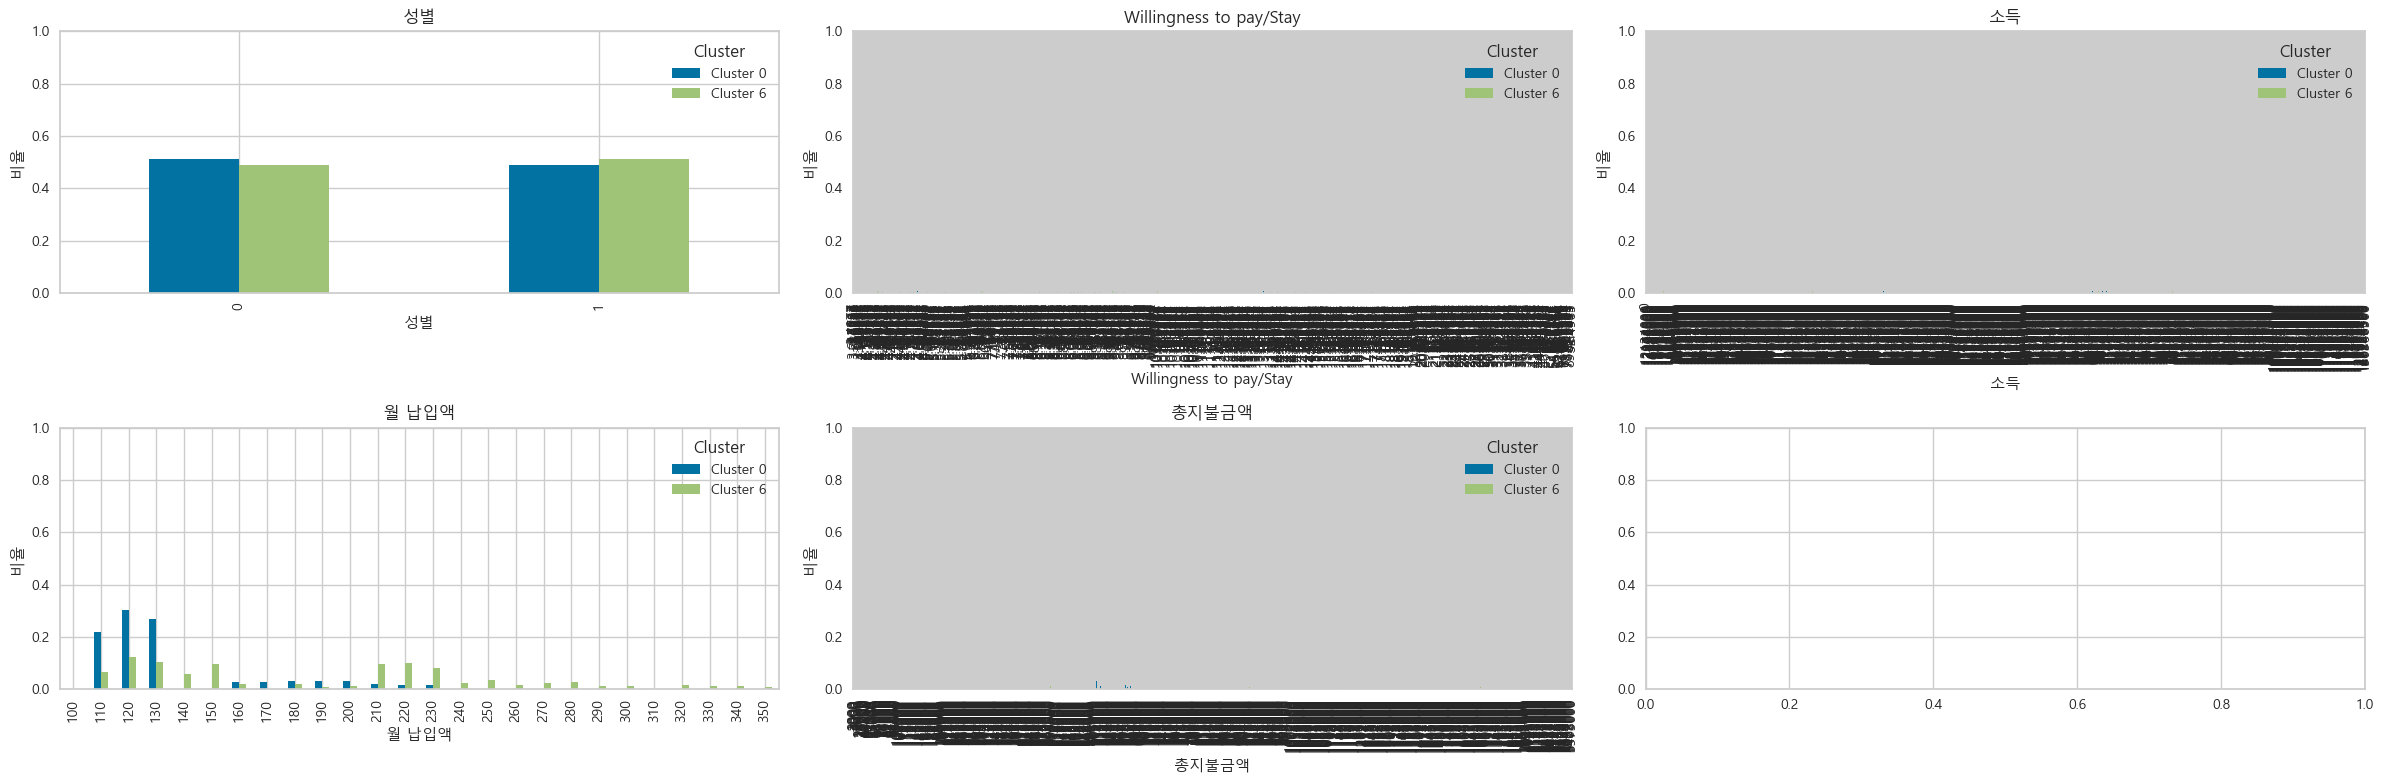

In [ ]:
categorical_cols = result.select_dtypes(exclude='object').columns.tolist()
categorical_cols.remove('cluster')
target_clusters = [0, 6]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    data = []
    for cluster_id in target_clusters:
        counts = result[result['cluster'] == cluster_id][col].value_counts(normalize=True)
        for category, ratio in counts.items():
            data.append({'cluster': f'Cluster {cluster_id}', col: category, 'ratio': ratio})

    df_plot = pd.DataFrame(data)

    pivot = df_plot.pivot(index=col, columns='cluster', values='ratio').fillna(0)
    pivot.plot(kind='bar', ax=ax)

    ax.set_title(f"{col}")
    ax.set_ylabel("비율")
    ax.set_xlabel(col)
    ax.set_ylim(0, 1)
    ax.legend(title='Cluster')

plt.tight_layout()
plt.savefig('1~5_continuous.pdf')
plt.show()


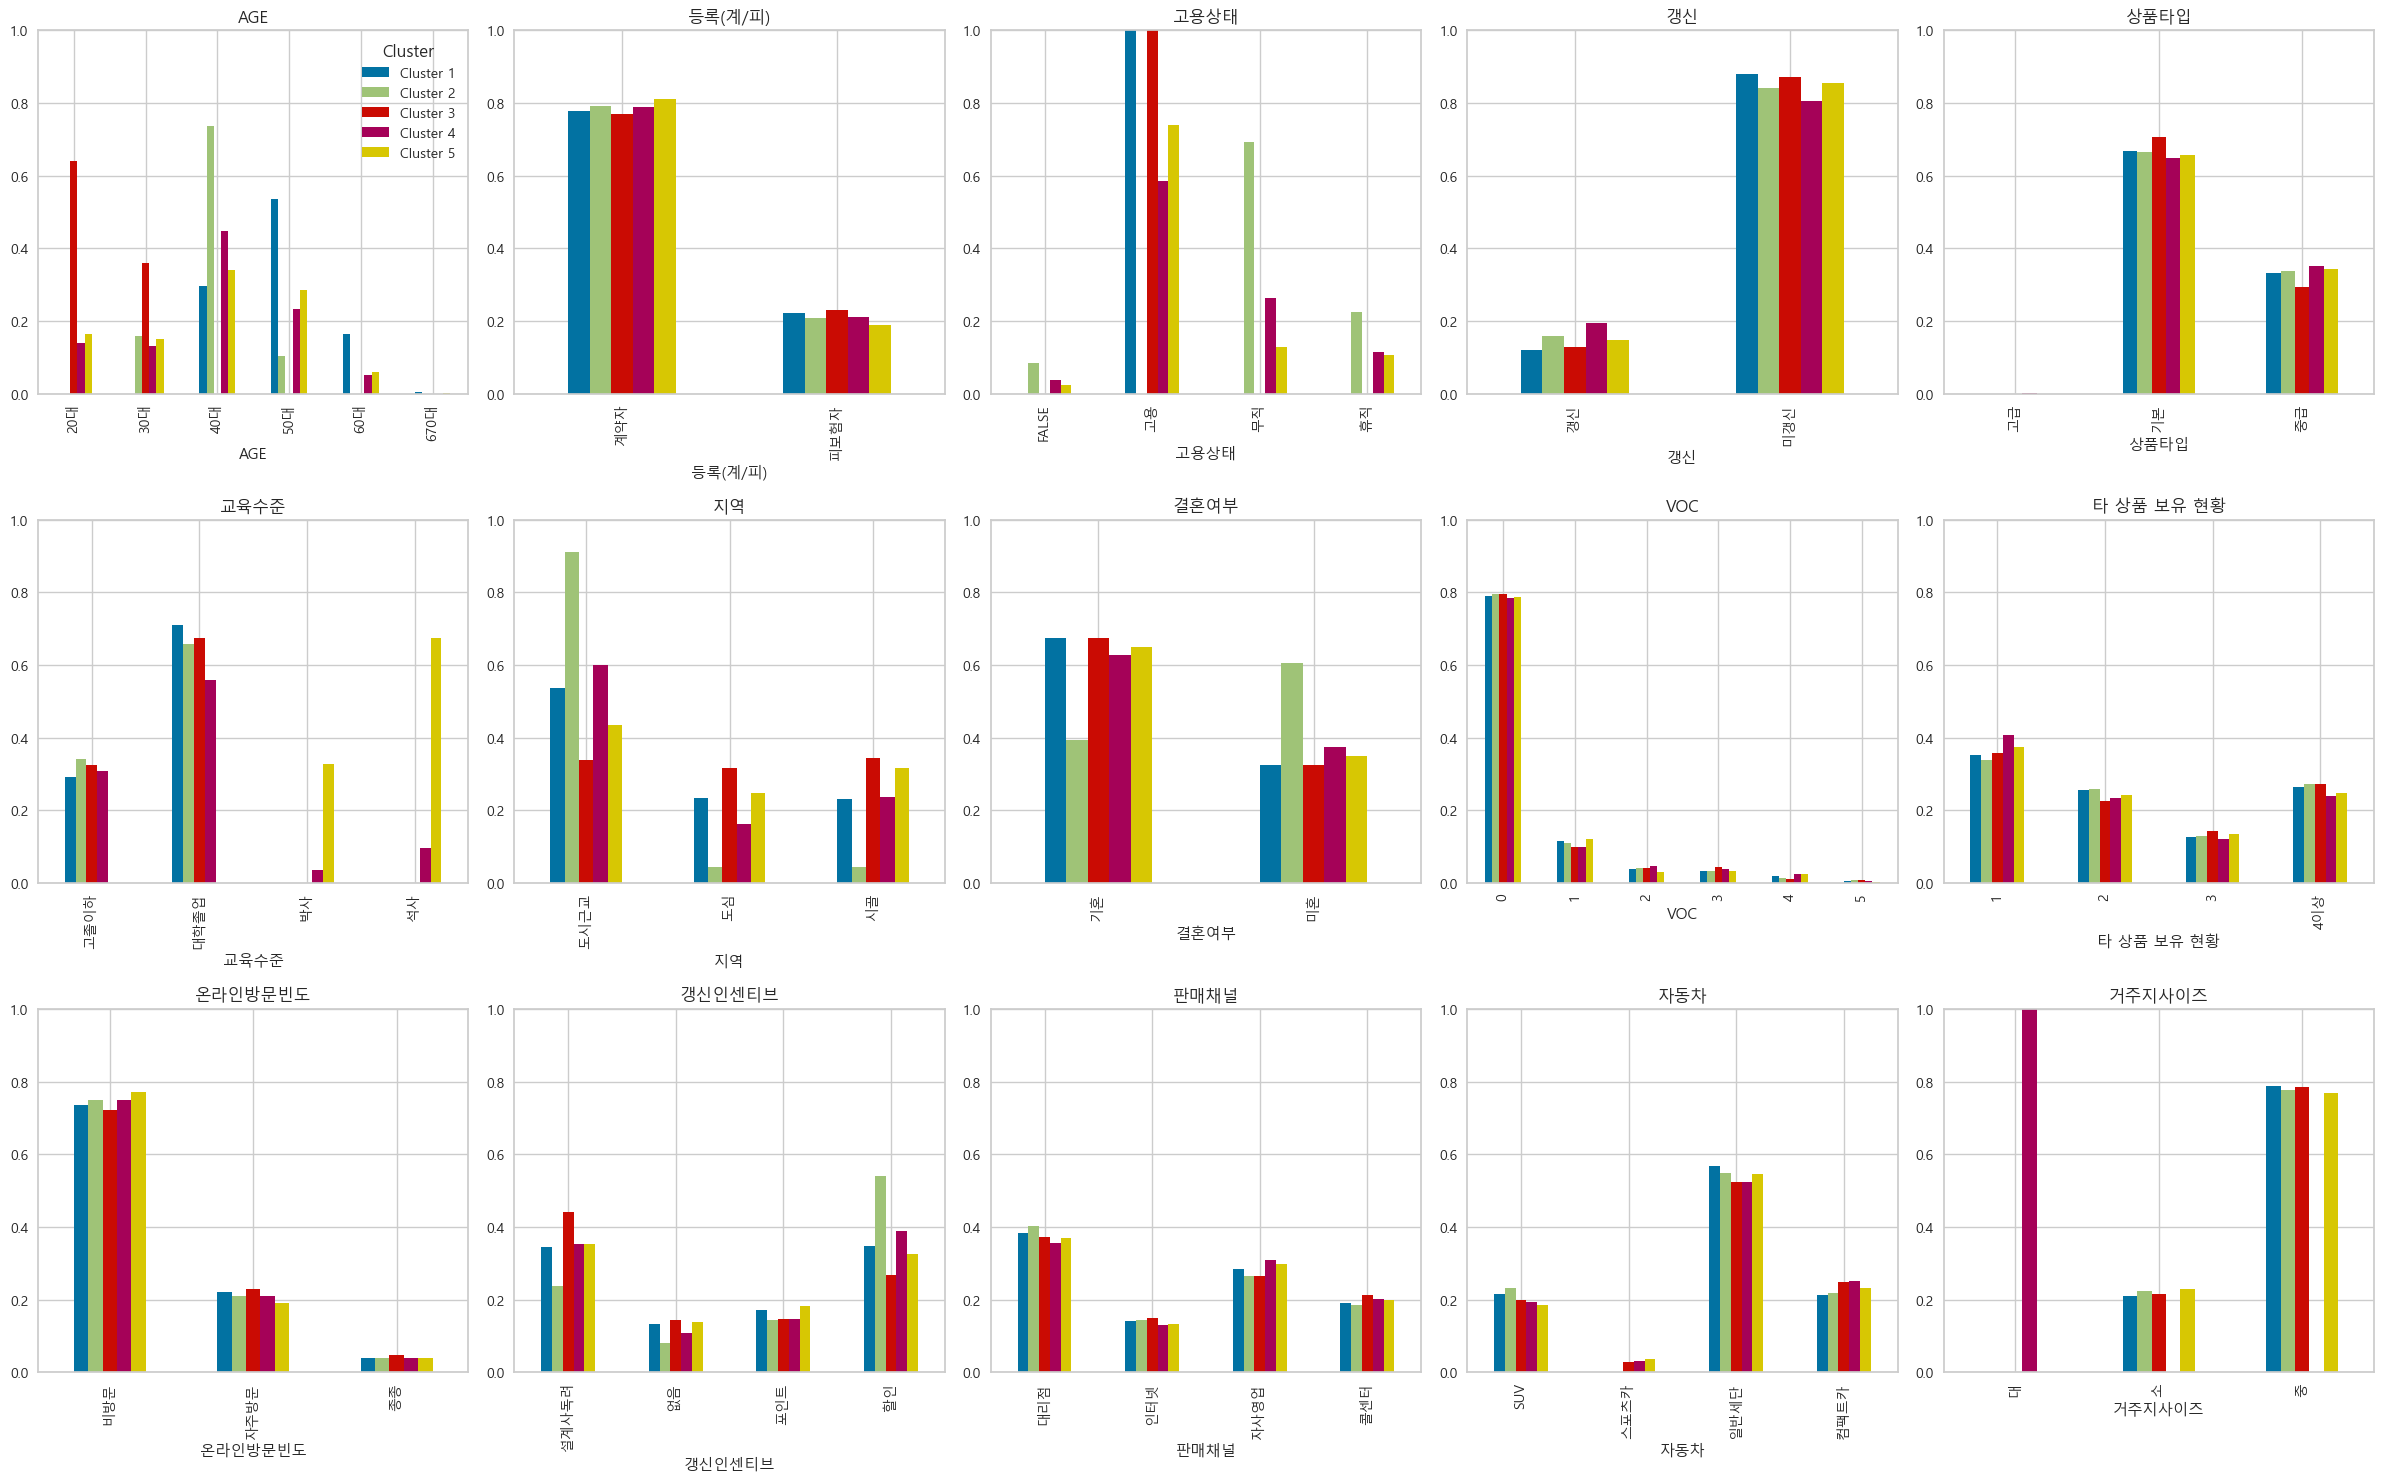

In [ ]:
categorical_cols = result.select_dtypes(include='object').columns.tolist()
target_clusters = [1, 2, 3, 4, 5]

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(24, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    data = []
    for cluster_id in target_clusters:
        counts = result[result['cluster'] == cluster_id][col].value_counts(normalize=True)
        for category, ratio in counts.items():
            data.append({'cluster': f'Cluster {cluster_id}', col: category, 'ratio': ratio})

    df_plot = pd.DataFrame(data)

    pivot = df_plot.pivot(index=col, columns='cluster', values='ratio').fillna(0)
    pivot.plot(kind='bar', ax=ax)

    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylim(0, 1)
    if i == 0:
        ax.legend(title='Cluster')
    else:
        ax.legend().remove()

plt.tight_layout()
plt.savefig('1~5_category.pdf')
plt.show()
